# Meta Kaggle Hackathon Dataset Exploration

### There are two primary datasets to consider:
 - [Meta Kaggle](https://www.kaggle.com/datasets/kaggle/meta-kaggle)
 - [Meta Kaggle Code](https://www.kaggle.com/datasets/kaggle/meta-kaggle-code)

Meta Kaggle contains .CSV files that record site activity on Kaggle.

Meta Kaggle for Code contains .ipynb and .py files full of code that was shared on Kaggle.


In [1]:
%env KAGGLEHUB_CACHE=/Volumes/LaCie/ML/meta-kaggle-hackathon/datasets

env: KAGGLEHUB_CACHE=/Volumes/LaCie/ML/meta-kaggle-hackathon/datasets


In [2]:
!echo $KAGGLEHUB_CACHE

/Volumes/LaCie/ML/meta-kaggle-hackathon/datasets


In [4]:
import kagglehub
import os

# Define the dataset names
MK_DATASET = "meta-kaggle"
MKC_DATASET = "meta-kaggle-code"

# Define paths where datasets would be stored if already downloaded
# Note: This assumes the KAGGLEHUB_CACHE environment variable is set properly
kaggle_cache = os.environ.get('KAGGLEHUB_CACHE', os.path.expanduser("~/.kagglehub/cache"))
mk_path_pattern = f"{kaggle_cache}/{MK_DATASET}/versions/*"
mkc_path_pattern = f"{kaggle_cache}/{MKC_DATASET}/versions/*"

# Check if datasets already exist
import glob
existing_mk_paths = glob.glob(mk_path_pattern)
existing_mkc_paths = glob.glob(mkc_path_pattern)
print(existing_mk_paths, existing_mkc_paths)

['/Volumes/LaCie/ML/meta-kaggle-hackathon/datasets/meta-kaggle/versions/1819'] ['/Volumes/LaCie/ML/meta-kaggle-hackathon/datasets/meta-kaggle-code/versions/115']


In [ ]:
# Download only if needed
if existing_mk_paths:
    print(f"Meta-Kaggle dataset already exists at: {existing_mk_paths[0]}")
    MK_PATH = existing_mk_paths[0]
else:
    print("Downloading Meta-Kaggle dataset...")
    MK_PATH = kagglehub.dataset_download(MK_DATASET)

if existing_mkc_paths:
    print(f"Meta-Kaggle-Code dataset already exists at: {existing_mkc_paths[0]}")
    MKC_PATH = existing_mkc_paths[0]
else:
    print("Downloading Meta-Kaggle-Code dataset...")
    MKC_PATH = kagglehub.dataset_download(MKC_DATASET)

print("Path to Meta-Kaggle dataset files:", MK_PATH)
print("Path to Meta-Kaggle-Code dataset files:", MKC_PATH)

In [15]:
import pandas as pd
import codecs
import glob
import json
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, module='pandas.io.formats.format')


def id_to_path(file_id: int) -> str:
    padded_id_str = str(file_id).zfill(10)
    prefix = f"{MKC_PATH}/{padded_id_str[0:4]}/{padded_id_str[4:7]}/{file_id}.*"
    matching_paths = glob.glob(prefix)
    if len(matching_paths) == 1:
        return matching_paths[0]
    return ""


def get_file_extension(file_path: str) -> str:
    parts = os.path.splitext(file_path)
    if len(parts) != 2:
        return ""
    return parts[1]


def path_to_id(file_path: str) -> int | None:
    base_name, _ = os.path.splitext(os.path.basename(file_path))
    if base_name:
        try:
            return int(base_name)
        except ValueError:
            return None
    return None


def get_ipynb_source(ipynb_path: str) -> list[list[str]]:
    with codecs.open(ipynb_path, 'r', encoding='utf-8') as f:
        raw_source_content = f.read()

    json_data = json.loads(raw_source_content)
    cells_source = []
    for cell in json_data.get('cells', []):
        if cell.get('cell_type') == 'code':
            cells_source.append(cell.get('source', []))
    return cells_source


def get_source_code(file_path: str) -> list[list[str]]:
    file_extension = get_file_extension(file_path)
    if file_extension == ".ipynb":
        return get_ipynb_source(file_path)
    return [Path(file_path).read_text().splitlines()]


def get_source_code_by_id(file_id: int) -> list[list[str]] | None:
    file_path = id_to_path(file_id)
    if file_path:
        return get_source_code(file_path)
    return None


def get_version_by_id(version_id: int) -> pd.Series:
    return versions.loc[version_id]


def get_kernel_by_id(kernel_id: int) -> pd.Series:
    return kernels.loc[kernel_id]

def get_first_n_files(path, n=10):
    found_files = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            found_files.append(filename)
            if len(found_files) >= n:
                return found_files
    return found_files

### This is what the Meta Kaggle data looks like.

In [16]:
for dirname, _, filenames in os.walk(MK_PATH):
    for filename in filenames:
        print(filename)

CompetitionTags.csv
Competitions.csv
DatasetTags.csv
DatasetTaskSubmissions.csv
DatasetTasks.csv
DatasetVersions.csv
DatasetVotes.csv
Datasets.csv
Datasources.csv
EpisodeAgents.csv
Episodes.csv
ForumMessageReactions.csv
ForumMessageVotes.csv
ForumMessages.csv
ForumTopics.csv
Forums.csv
KernelAcceleratorTypes.csv
KernelLanguages.csv
KernelTags.csv
KernelVersionCompetitionSources.csv
KernelVersionDatasetSources.csv
KernelVersionKernelSources.csv
KernelVersionModelSources.csv
KernelVersions.csv
KernelVotes.csv
Kernels.csv
ModelTags.csv
ModelVariationVersions.csv
ModelVariations.csv
ModelVersions.csv
ModelVotes.csv
Models.csv
Organizations.csv
Submissions.csv
Tags.csv
TeamMemberships.csv
Teams.csv
UserAchievements.csv
UserFollowers.csv
UserOrganizations.csv
Users.csv


## This is what the Kernels.csv table looks like
 - Note: The term "Kernels" refers to "Kaggle Notebooks". 

In [17]:
kernels_file_name = f"{MK_PATH}/Kernels.csv"
kernels = pd.read_csv(kernels_file_name)
kernels.set_index("Id", inplace = True)
print("\nKernels Table:\n")
kernels.head()


Kernels Table:



,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
Id,,,,,,,,,,,,,,,
1,2505,205.0,NaN,589767.0,1.0,03/25/2015 18:25:32,03/23/2018,03/25/2015,False,hello,3.0,07/07/2025,483,1,164
2,3716,1748.0,NaN,26670.0,2.0,03/25/2015 18:31:07,04/16/2015,03/25/2015,False,rf-proximity,3.0,07/15/2016,9226,1,70
4,3716,41.0,NaN,NaN,9.0,03/25/2015 21:57:36,03/23/2018,03/25/2015,False,r-version,NaN,NaN,191,0,0
5,28963,19.0,NaN,NaN,13.0,03/25/2015 22:01:04,03/23/2018,03/25/2015,False,test1,NaN,NaN,151,0,0
6,3716,21.0,NaN,NaN,15.0,03/25/2015 22:19:00,03/23/2018,03/25/2015,False,are-icons-missing,NaN,NaN,186,0,40


## A given Kernel can have multiple Versions
 - A single KernelId can map to multiple KernelVersionIds

In [18]:
versions_file_name = f"{MK_PATH}/KernelVersions.csv"
versions = pd.read_csv(versions_file_name)
versions.set_index("Id", inplace = True)
print("KernelVersions Table:\n")
versions.head()

/var/folders/_h/7y8rd_151mq21lkkjcn0yxbc0000gn/T/ipykernel_9878/202921013.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  versions = pd.read_csv(versions_file_name)


KernelVersions Table:



,ScriptId,ParentScriptVersionId,ScriptLanguageId,AuthorUserId,CreationDate,VersionNumber,Title,EvaluationDate,IsChange,TotalLines,...,LinesUnchangedFromPrevious,LinesInsertedFromFork,LinesDeletedFromFork,LinesChangedFromFork,LinesUnchangedFromFork,TotalVotes,IsInternetEnabled,RunningTimeInMilliseconds,AcceleratorTypeId,DockerImage
Id,,,,,,,,,,,,,,,,,,,,,
2524,599,NaN,1,368,04/24/2015 17:00:52,2.0,Random Forest Benchmark,04/24/2015,True,58.0,...,53.0,6.0,18.0,0.0,52.0,0,False,25095.0,0,NaN
763800,88177,NaN,9,368,01/26/2017 06:26:01,84.0,Trueskill for kitefoil rankings by race,01/26/2017,True,569.0,...,1067.0,NaN,NaN,NaN,NaN,5,False,60444.0,0,NaN
711036,112370,NaN,9,368,01/16/2017 01:55:08,32.0,Calculate Velocity Made Good (VMG),01/16/2017,True,196.0,...,280.0,NaN,NaN,NaN,NaN,0,False,4191061.0,0,NaN
222755,58777,NaN,9,527964,04/29/2016 22:50:42,5.0,Titanic,04/29/2016,True,38.0,...,0.0,NaN,NaN,NaN,NaN,0,False,50122.0,0,NaN
365369,58777,NaN,9,527964,09/16/2016 01:25:56,65.0,Titanic,09/16/2016,True,60.0,...,58.0,NaN,NaN,NaN,NaN,0,False,1204765.0,0,NaN


## This is what the Meta Kaggle Code data looks like
 - Each file is labeled according to its KernelVersionId

In [19]:
first_20_files = get_first_n_files(MKC_PATH, 20)

print("First 20 files:\n")
for filename in first_20_files:
   print(filename)

First 20 files:

1.r
10.r
100.r
101.r
102.r
103.r
104.r
105.r
106.r
107.r
108.r
109.r
11.r
110.r
111.r
112.r
113.r
114.r
115.r
116.r


Let's look at KernelVersionId 1,000

In [20]:
id = 1000
source = get_source_code_by_id(id)

file_path_for_id = id_to_path(id)
print(f"\nPath for ID {id}: {file_path_for_id}")
print(f"ID from path: {path_to_id(file_path_for_id)}")
print(f"File extension: {get_file_extension(file_path_for_id)}")


Path for ID 1000: /Volumes/LaCie/ML/meta-kaggle-dataset/datasets/kaggle/meta-kaggle-code/versions/115/0000/001/1000.py
ID from path: 1000
File extension: .py


Looks like a Python script!

In [21]:
print(f"\nSource code for ID {id} (first 10 lines of first cell/file):\n")
if source:
    if source and source[0]:
        for line in source[0][:10]:
            print(line)
        if len(source[0]) > 10:
            print("...")
    else:
        print("Source code is empty or malformed.")
else:
    print("Source code not found.")


Source code for ID 1000 (first 10 lines of first cell/file):

import sys
import numpy as np
from sklearn import cross_validation
import pandas as pd
import csv
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

def targetFeatureSplit( data ):
...


Yep, it's a Python script!

## Now let's see what we can find in the Meta Kaggle dataset about that same Python script

In [22]:
print(f"\nVersion by ID {id}:\n")
try:
    version_info = get_version_by_id(id)
    print(version_info)
    script_id = version_info['ScriptId']
    print(f"\nKernel by ScriptId {script_id}:\n")
    print(get_kernel_by_id(script_id))
except KeyError:
    print(f"Error: Version or Kernel with ID {id} not found.")


Version by ID 1000:

ScriptId                                                                    163
ParentScriptVersionId                                                       NaN
ScriptLanguageId                                                              2
AuthorUserId                                                             256815
CreationDate                                                04/09/2015 11:50:37
VersionNumber                                                              10.0
Title                                                              SVM with PCA
EvaluationDate                                                       03/23/2018
IsChange                                                                   True
TotalLines                                                                 45.0
LinesInsertedFromPrevious                                                   0.0
LinesChangedFromPrevious                                                    1.0
LinesUnchangedFrom

In [26]:
# Let's look at the Submissions dataset to understand performance trends
submissions_file_name = f"{MK_PATH}/Submissions.csv"
submissions = pd.read_csv(submissions_file_name)
print("Submissions Dataset Shape:", submissions.shape)
print("\nSubmissions Dataset Columns:")
print(submissions.columns.tolist())
print("\nFirst few submissions:")
submissions.head()

/var/folders/_h/7y8rd_151mq21lkkjcn0yxbc0000gn/T/ipykernel_9878/909280091.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions = pd.read_csv(submissions_file_name)


Submissions Dataset Shape: (16083586, 12)

Submissions Dataset Columns:
['Id', 'SubmittedUserId', 'TeamId', 'SourceKernelVersionId', 'SubmissionDate', 'ScoreDate', 'IsAfterDeadline', 'IsSelected', 'PublicScoreLeaderboardDisplay', 'PublicScoreFullPrecision', 'PrivateScoreLeaderboardDisplay', 'PrivateScoreFullPrecision']

First few submissions:


,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,IsSelected,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
0,2193,652.0,502,NaN,05/04/2010,NaN,False,False,56.25000,56.250000,56.79190,56.791901
1,2195,652.0,502,NaN,05/04/2010,NaN,False,False,53.84619,53.846199,56.64739,56.647400
2,2196,652.0,502,NaN,05/04/2010,NaN,False,False,52.40380,52.403801,55.78030,55.780300
3,2202,728.0,505,NaN,05/06/2010,NaN,False,False,50.00000,50.000000,48.55490,48.554901
4,2204,728.0,505,NaN,05/06/2010,NaN,False,False,48.55770,48.557701,56.93640,56.936401


In [27]:
# Let's explore the competition data to understand ML/AI progress
competitions_file_name = f"{MK_PATH}/Competitions.csv"
competitions = pd.read_csv(competitions_file_name)
print("Competitions Dataset Shape:", competitions.shape)
print("\nCompetitions Dataset Columns:")
print(competitions.columns.tolist())
print("\nFirst few competitions:")
competitions.head()

Competitions Dataset Shape: (9816, 48)

Competitions Dataset Columns:
['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId', 'OrganizationId', 'EnabledDate', 'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate', 'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate', 'FinalLeaderboardHasBeenVerified', 'HasKernels', 'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage', 'ScoreTruncationNumDecimals', 'EvaluationAlgorithmAbbreviation', 'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription', 'EvaluationAlgorithmIsMax', 'MaxDailySubmissions', 'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers', 'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes', 'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams', 'TotalCompetitors', 'TotalSubmissions', 'LicenseName', 'Overview', 'Rules', 'DatasetDescription', 'TotalCompressedBytes', 'TotalUncompressedBytes', 'ValidationSetName', 'ValidationSetValue', 'EnableSubmissionModelHashes',

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,Rules,DatasetDescription,TotalCompressedBytes,TotalUncompressedBytes,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2.0,NaN,04/07/2010 07:57:43,05/25/2010 18:00:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p><b>Data provided<b...,800614.0,400307.0,NaN,NaN,False,False,NaN,1
1,2435,hivprogression,Predict HIV Progression,This contest requires competitors to predict t...,Featured,1.0,NaN,04/27/2010 21:29:09,08/02/2010 12:32:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<div><div><div>These ...,2141503.0,1095096.0,NaN,NaN,False,False,NaN,1
2,2438,worldcup2010,World Cup 2010 - Take on the Quants,Quants at Goldman Sachs and JP Morgan have mod...,Featured,3094129.0,NaN,06/03/2010 08:08:08,06/11/2010 13:29:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p>We have provided a...,10401.0,10401.0,NaN,NaN,False,False,NaN,1
3,2439,informs2010,INFORMS Data Mining Contest 2010,The goal of this contest is to predict short t...,Featured,4.0,NaN,06/21/2010 21:53:25,10/10/2010 02:28:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,"# Dataset Description\n\n<div><span class=""App...",14718207.0,14718207.0,NaN,NaN,False,False,NaN,1
4,2442,worldcupconf,World Cup 2010 - Confidence Challenge,The Confidence Challenge requires competitors ...,Featured,3.0,NaN,06/03/2010 08:08:08,06/11/2010 13:28:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p>We have provided a...,NaN,NaN,NaN,NaN,False,False,NaN,1


In [28]:
# Let's analyze model performance trends over time in competitions
# This can help us understand the progress in ML/AI

# Function to analyze competition performance trends
def analyze_competition_performance(competition_id, submissions_df):
    """Analyze how performance in a specific competition has evolved over time"""
    if 'CompetitionId' not in submissions_df.columns:
        return None
    
    comp_submissions = submissions_df[submissions_df['CompetitionId'] == competition_id].copy()
    
    if comp_submissions.empty:
        return None
    
    # Ensure we have the necessary columns
    required_cols = ['SubmissionDate', 'PublicScore']
    if not all(col in comp_submissions.columns for col in required_cols):
        return None
    
    # Convert date and ensure score is numeric
    try:
        comp_submissions['SubmissionDate'] = pd.to_datetime(comp_submissions['SubmissionDate'], errors='coerce')
        comp_submissions['PublicScore'] = pd.to_numeric(comp_submissions['PublicScore'], errors='coerce')
        
        # Drop rows with missing dates or scores
        comp_submissions = comp_submissions.dropna(subset=['SubmissionDate', 'PublicScore'])
        
        if comp_submissions.empty:
            return None
        
        # Sort by date
        comp_submissions = comp_submissions.sort_values('SubmissionDate')
        
        # Calculate rolling best score over time
        if len(comp_submissions) > 0:
            # Determine if higher or lower scores are better
            # This is a simplistic approach - ideally we'd check the competition's actual metric
            first_score = comp_submissions['PublicScore'].iloc[0]
            last_score = comp_submissions['PublicScore'].iloc[-1]
            
            # Assuming improvement over time
            higher_is_better = last_score > first_score
            
            if higher_is_better:
                comp_submissions['BestScore'] = comp_submissions['PublicScore'].cummax()
            else:
                comp_submissions['BestScore'] = comp_submissions['PublicScore'].cummin()
                
            return comp_submissions
    except:
        pass
    
    return None

# Get a list of completed competitions
if 'EnabledDate' in competitions.columns and 'DeadlineDate' in competitions.columns:
    try:
        competitions['EnabledDate'] = pd.to_datetime(competitions['EnabledDate'], errors='coerce')
        competitions['DeadlineDate'] = pd.to_datetime(competitions['DeadlineDate'], errors='coerce')
        completed_competitions = competitions.dropna(subset=['EnabledDate', 'DeadlineDate'])
        
        # Find competitions with sufficient submissions
        if 'CompetitionId' in submissions.columns:
            submission_counts = submissions['CompetitionId'].value_counts()
            popular_competitions = submission_counts[submission_counts > 100].index.tolist()
            
            print(f"Found {len(popular_competitions)} competitions with over 100 submissions")
            
            # Select a competition for detailed analysis
            if popular_competitions:
                sample_competition_id = popular_competitions[0]
                competition_name = "Unknown"
                
                if 'Id' in competitions.columns and 'Title' in competitions.columns:
                    comp_info = competitions[competitions['Id'] == sample_competition_id]
                    if not comp_info.empty and 'Title' in comp_info.columns:
                        competition_name = comp_info['Title'].iloc[0]
                
                print(f"\nAnalyzing competition performance trends for: {competition_name} (ID: {sample_competition_id})")
                
                # Analyze the performance trends
                performance_data = analyze_competition_performance(sample_competition_id, submissions)
                
                if performance_data is not None and not performance_data.empty:
                    # Resample to daily frequency for clarity in visualization
                    daily_best = performance_data.set_index('SubmissionDate')
                    daily_best = daily_best[['BestScore']].resample('D').max().fillna(method='ffill')
                    
                    print(f"Performance data available from {daily_best.index.min()} to {daily_best.index.max()}")
                    
                    try:
                        import matplotlib.pyplot as plt
                        import matplotlib.dates as mdates
                        
                        plt.figure(figsize=(14, 8))
                        plt.plot(daily_best.index, daily_best['BestScore'])
                        plt.title(f'Performance Evolution in Competition: {competition_name}')
                        plt.xlabel('Date')
                        plt.ylabel('Best Score')
                        plt.grid(True, alpha=0.3)
                        
                        # Format x-axis date ticks
                        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
                        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
                        plt.gcf().autofmt_xdate()
                        
                        plt.tight_layout()
                        plt.show()
                    except:
                        print("Couldn't create plot. Matplotlib may not be available.")
                else:
                    print("Insufficient performance data for analysis")
    except:
        print("Error analyzing competition performance trends")

Total Python notebooks: 279602
Sampling 1000 Python notebooks...

Analyzed 921 Python notebooks successfully

Top 20 imported Python libraries:
sklearn: 1830 (198.7%)
pandas: 876 (95.1%)
numpy: 875 (95.0%)
keras: 438 (47.6%)
matplotlib: 297 (32.2%)
os: 278 (30.2%)
torch: 214 (23.2%)
subprocess: 202 (21.9%)
scipy: 153 (16.6%)
xgboost: 134 (14.5%)
datetime: 131 (14.2%)
tensorflow: 129 (14.0%)
random: 123 (13.4%)
time: 122 (13.2%)
seaborn: 92 (10.0%)
gc: 88 (9.6%)
sys: 87 (9.4%)
PIL: 87 (9.4%)
math: 86 (9.3%)
re: 85 (9.2%)


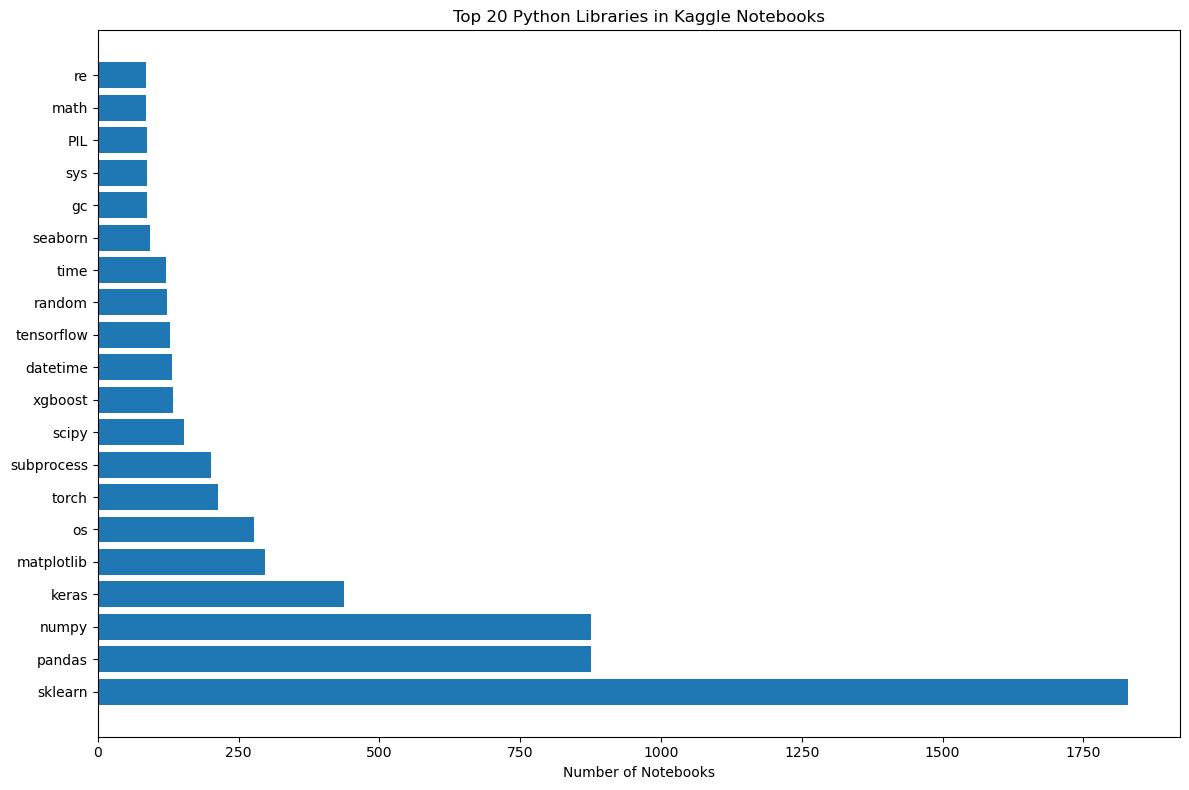

In [29]:
# Let's analyze ML/AI library usage in Python notebooks
import re
import random
from collections import Counter

# Function to extract library imports from Python code
def extract_python_imports(source_code):
    if not source_code or not isinstance(source_code, list) or not source_code[0]:
        return []
    
    imports = []
    import_patterns = [
        r'^\s*import\s+([a-zA-Z0-9_\.]+)', 
        r'^\s*from\s+([a-zA-Z0-9_\.]+)\s+import'
    ]
    
    for line in source_code[0]:
        for pattern in import_patterns:
            match = re.search(pattern, line)
            if match:
                # Extract the base package name (first component)
                lib = match.group(1).split('.')[0]
                imports.append(lib)
    
    return imports

# Sample a set of Python notebooks to analyze
python_versions = versions[versions['ScriptLanguageId'] == 2]  # Assuming 2 = Python
print(f"Total Python notebooks: {len(python_versions)}")

# Sample a manageable number of notebooks
sample_size = min(1000, len(python_versions))
sample_ids = random.sample(python_versions.index.tolist(), sample_size)
print(f"Sampling {sample_size} Python notebooks...")

# Extract imports from sampled notebooks
all_imports = []
successful_samples = 0

for kernel_id in sample_ids:
    source = get_source_code_by_id(kernel_id)
    if source:
        imports = extract_python_imports(source)
        if imports:
            all_imports.extend(imports)
            successful_samples += 1

# Count the most common libraries
import_counts = Counter(all_imports)
top_libraries = import_counts.most_common(20)

print(f"\nAnalyzed {successful_samples} Python notebooks successfully")
print("\nTop 20 imported Python libraries:")
for lib, count in top_libraries:
    print(f"{lib}: {count} ({count/successful_samples*100:.1f}%)")

# Plot the results
try:
    import matplotlib.pyplot as plt
    
    libraries, counts = zip(*top_libraries)
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(libraries)), counts, align='center')
    plt.yticks(range(len(libraries)), libraries)
    plt.xlabel('Number of Notebooks')
    plt.title('Top 20 Python Libraries in Kaggle Notebooks')
    plt.tight_layout()
    plt.show()
except:
    print("Couldn't create plot. Matplotlib may not be available.")

In [30]:
# Let's analyze how kernels and competitions are connected
kernel_version_competition_sources_file = f"{MK_PATH}/KernelVersionCompetitionSources.csv"
kvcs = pd.read_csv(kernel_version_competition_sources_file)
print("KernelVersionCompetitionSources Dataset Shape:", kvcs.shape)
print("\nKernelVersionCompetitionSources Dataset Columns:")
print(kvcs.columns.tolist())
print("\nFirst few records:")
kvcs.head()

# Count kernels per competition
if not kvcs.empty and 'CompetitionId' in kvcs.columns:
    kernels_per_competition = kvcs['CompetitionId'].value_counts()
    top_competitions = kernels_per_competition.sort_values(ascending=False).head(10)
    print("\nTop 10 Competitions by Number of Associated Kernels:")
    print(top_competitions)
    
    # Get competition names for the top competitions
    if 'Id' in competitions.columns and 'Title' in competitions.columns:
        top_competition_ids = top_competitions.index.tolist()
        top_competition_names = competitions[competitions['Id'].isin(top_competition_ids)]
        
        if not top_competition_names.empty:
            top_competition_info = pd.DataFrame({
                'CompetitionId': top_competition_ids,
                'KernelCount': top_competitions.values,
                'CompetitionTitle': [
                    competitions[competitions['Id'] == cid]['Title'].iloc[0] 
                    if not competitions[competitions['Id'] == cid].empty else f"Unknown ({cid})" 
                    for cid in top_competition_ids
                ]
            })
            print("\nTop Competitions with Titles:")
            print(top_competition_info)

KernelVersionCompetitionSources Dataset Shape: (4836525, 3)

KernelVersionCompetitionSources Dataset Columns:
['Id', 'KernelVersionId', 'SourceCompetitionId']

First few records:


KernelLanguages Dataset:
   Id                         Name DisplayName  IsNotebook
0   1                            R           R       False
1   2                       Python      Python       False
2   5                    RMarkdown           R       False
3   8             IPython Notebook      Python        True
4   9        IPython Notebook HTML      Python       False
5  12              R Notebook HTML           R       False
6  13                   R Notebook           R        True
7  14  Python Script - Interactive      Python        True
8  15       R Script - Interactive           R        True
9  16      RMarkdown - Interactive           R        True

Kernels by Language ID:
ScriptLanguageId
8     8801331
9     5245604
13     326248
2      279602
12     279358
1      118018
5      100994
14      64176
16      28751
15      13295
7        5558
6        2885
11        415
10         29
Name: count, dtype: int64

Kernels by Language:
ScriptLanguageId
IPython Notebook       

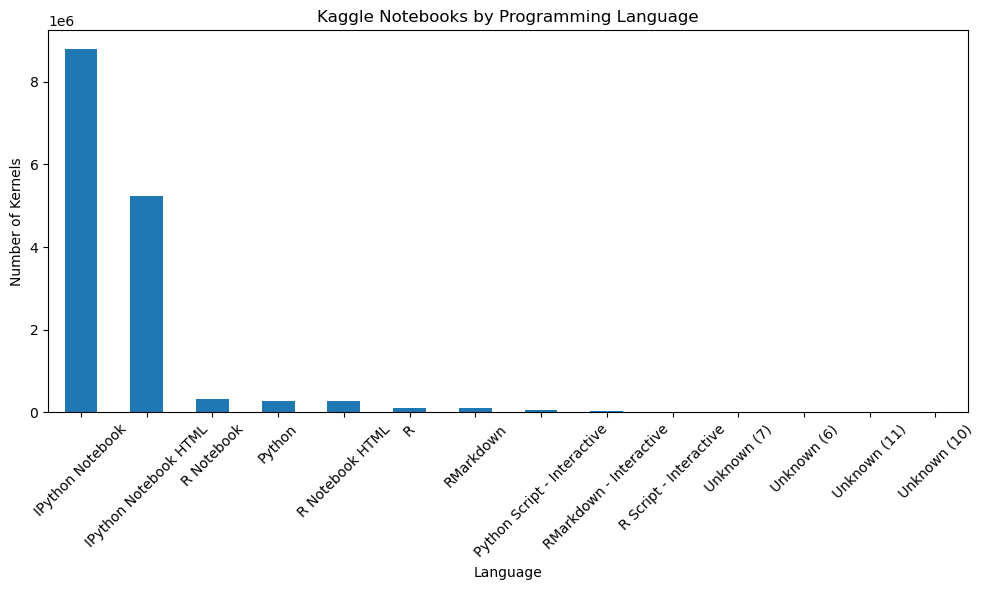

In [31]:
# Let's explore the KernelLanguages to understand programming language trends
kernel_languages_file_name = f"{MK_PATH}/KernelLanguages.csv"
kernel_languages = pd.read_csv(kernel_languages_file_name)
print("KernelLanguages Dataset:")
print(kernel_languages)

# Get language distribution in kernels
language_counts = versions['ScriptLanguageId'].value_counts()
print("\nKernels by Language ID:")
print(language_counts)

# Map language IDs to names
if not kernel_languages.empty and 'Id' in kernel_languages.columns and 'Name' in kernel_languages.columns:
    language_map = dict(zip(kernel_languages['Id'], kernel_languages['Name']))
    language_names = language_counts.index.map(lambda x: language_map.get(x, f"Unknown ({x})"))
    language_distribution = pd.Series(language_counts.values, index=language_names)
    print("\nKernels by Language:")
    print(language_distribution)
    
    # Plot language distribution
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        language_distribution.plot(kind='bar')
        plt.title('Kaggle Notebooks by Programming Language')
        plt.xlabel('Language')
        plt.ylabel('Number of Kernels')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except:
        print("Couldn't create plot. Matplotlib may not be available.")

In [32]:
# Let's examine Users data to understand community growth
users_file_name = f"{MK_PATH}/Users.csv"
users = pd.read_csv(users_file_name)
print("Users Dataset Shape:", users.shape)
print("\nUsers Dataset Columns:")
print(users.columns.tolist())

# Look at user registration growth over time
if 'CreationDate' in users.columns:
    users['CreationDate'] = pd.to_datetime(users['CreationDate'], errors='coerce')
    users['CreationYear'] = users['CreationDate'].dt.year
    users['CreationMonth'] = users['CreationDate'].dt.month
    
    # Count users by year
    users_by_year = users.groupby('CreationYear').size()
    print("\nUsers registered per year:")
    print(users_by_year)
    
    # Plot user growth
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        users_by_year.plot(kind='bar')
        plt.title('Kaggle User Growth by Year')
        plt.xlabel('Year')
        plt.ylabel('Number of New Users')
        plt.tight_layout()
        plt.show()
    except:
        print("Couldn't create plot. Matplotlib may not be available.")

Users Dataset Shape: (25128271, 7)

Users Dataset Columns:
['Id', 'UserName', 'DisplayName', 'RegisterDate', 'PerformanceTier', 'Country', 'LocationSharingOptOut']


In [38]:
# Function to explore CSV files
def explore_csv(file_name, max_rows=5):
    """Explore a CSV file and return information about its structure and content"""
    file_path = f"{MK_PATH}/{file_name}"
    try:
        # Load the CSV file
        df = pd.read_csv(file_path, low_memory=False)
        
        # Get basic information
        print(f"## {file_name}")
        print(f"Shape: {df.shape}")
        print("\nColumns:")
        print(df.columns.tolist())
        
        # Data types
        print("\nData Types:")
        print(df.dtypes)
        
        # Sample data
        print(f"\nSample data ({max_rows} rows):")
        display(df.head(max_rows))
        
        # Additional statistics for numeric columns
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        if len(numeric_cols) > 0:
            print("\nNumeric Column Statistics:")
            display(df[numeric_cols].describe())
        
        # Check for missing values
        missing = df.isnull().sum()
        missing = missing[missing > 0]
        if not missing.empty:
            print("\nMissing Values:")
            print(missing)
            
        # Return the dataframe for further exploration if needed
        return df
    except Exception as e:
        print(f"Error exploring {file_name}: {e}")
        return None

In [39]:
# Get all CSV files in Meta Kaggle dataset
csv_files = []
for _, _, filenames in os.walk(MK_PATH):
    for filename in filenames:
        if filename.endswith('.csv'):
            csv_files.append(filename)
    break  # Only look at the top level directory

print(f"Found {len(csv_files)} CSV files in Meta Kaggle dataset:")
print(sorted(csv_files))

Found 41 CSV files in Meta Kaggle dataset:
['CompetitionTags.csv', 'Competitions.csv', 'DatasetTags.csv', 'DatasetTaskSubmissions.csv', 'DatasetTasks.csv', 'DatasetVersions.csv', 'DatasetVotes.csv', 'Datasets.csv', 'Datasources.csv', 'EpisodeAgents.csv', 'Episodes.csv', 'ForumMessageReactions.csv', 'ForumMessageVotes.csv', 'ForumMessages.csv', 'ForumTopics.csv', 'Forums.csv', 'KernelAcceleratorTypes.csv', 'KernelLanguages.csv', 'KernelTags.csv', 'KernelVersionCompetitionSources.csv', 'KernelVersionDatasetSources.csv', 'KernelVersionKernelSources.csv', 'KernelVersionModelSources.csv', 'KernelVersions.csv', 'KernelVotes.csv', 'Kernels.csv', 'ModelTags.csv', 'ModelVariationVersions.csv', 'ModelVariations.csv', 'ModelVersions.csv', 'ModelVotes.csv', 'Models.csv', 'Organizations.csv', 'Submissions.csv', 'Tags.csv', 'TeamMemberships.csv', 'Teams.csv', 'UserAchievements.csv', 'UserFollowers.csv', 'UserOrganizations.csv', 'Users.csv']


In [40]:
# Let's create a dedicated exploration of important CSV files
print("# Exploring Key Meta Kaggle Dataset Files\n")

# Primary files to explore first
key_files = [
    "Competitions.csv",
    "Users.csv", 
    "Kernels.csv",
    "KernelVersions.csv",
    "Submissions.csv"
]

# Explore each key file with more detailed analysis
for file in key_files:
    print("\n" + "="*80)
    df = explore_csv(file)
    print("="*80)
    
    # Additional specific analysis for each file type
    if file == "Competitions.csv" and df is not None:
        # Competition timeline analysis
        if 'EnabledDate' in df.columns and 'DeadlineDate' in df.columns:
            df['EnabledDate'] = pd.to_datetime(df['EnabledDate'], errors='coerce')
            df['DeadlineDate'] = pd.to_datetime(df['DeadlineDate'], errors='coerce')
            df['Duration'] = (df['DeadlineDate'] - df['EnabledDate']).dt.days
            
            print("\nCompetition Duration Statistics (days):")
            print(df['Duration'].describe())
            
            print("\nCompetitions by Year:")
            yearly_comps = df['EnabledDate'].dt.year.value_counts().sort_index()
            print(yearly_comps)
            
    elif file == "Users.csv" and df is not None:
        # User growth analysis
        if 'RegisterDate' in df.columns:
            df['RegisterDate'] = pd.to_datetime(df['RegisterDate'], errors='coerce')
            print("\nUser Registration by Year:")
            yearly_users = df['RegisterDate'].dt.year.value_counts().sort_index()
            print(yearly_users)
            
    elif file == "Kernels.csv" and df is not None:
        # Kernel popularity analysis
        if 'TotalViews' in df.columns:
            print("\nKernel Views Statistics:")
            print(df['TotalViews'].describe())
            
    elif file == "Submissions.csv" and df is not None:
        # Submission analysis
        print("\nSubmissions Overview:")
        if 'SubmissionDate' in df.columns:
            df['SubmissionDate'] = pd.to_datetime(df['SubmissionDate'], errors='coerce')
            print("\nSubmissions by Year:")
            sub_years = df['SubmissionDate'].dt.year.value_counts().sort_index()
            print(sub_years)

# Exploring Key Meta Kaggle Dataset Files


## Competitions.csv
Shape: (9816, 48)

Columns:
['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId', 'OrganizationId', 'EnabledDate', 'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate', 'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate', 'FinalLeaderboardHasBeenVerified', 'HasKernels', 'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage', 'ScoreTruncationNumDecimals', 'EvaluationAlgorithmAbbreviation', 'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription', 'EvaluationAlgorithmIsMax', 'MaxDailySubmissions', 'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers', 'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes', 'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams', 'TotalCompetitors', 'TotalSubmissions', 'LicenseName', 'Overview', 'Rules', 'DatasetDescription', 'TotalCompressedBytes', 'TotalUncompressedBytes', 'ValidationSetName', 'ValidationSetValue', 'EnableS

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,...,Rules,DatasetDescription,TotalCompressedBytes,TotalUncompressedBytes,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2.0,NaN,04/07/2010 07:57:43,05/25/2010 18:00:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p><b>Data provided<b...,800614.0,400307.0,NaN,NaN,False,False,NaN,1
1,2435,hivprogression,Predict HIV Progression,This contest requires competitors to predict t...,Featured,1.0,NaN,04/27/2010 21:29:09,08/02/2010 12:32:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<div><div><div>These ...,2141503.0,1095096.0,NaN,NaN,False,False,NaN,1
2,2438,worldcup2010,World Cup 2010 - Take on the Quants,Quants at Goldman Sachs and JP Morgan have mod...,Featured,3094129.0,NaN,06/03/2010 08:08:08,06/11/2010 13:29:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p>We have provided a...,10401.0,10401.0,NaN,NaN,False,False,NaN,1
3,2439,informs2010,INFORMS Data Mining Contest 2010,The goal of this contest is to predict short t...,Featured,4.0,NaN,06/21/2010 21:53:25,10/10/2010 02:28:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,"# Dataset Description\n\n<div><span class=""App...",14718207.0,14718207.0,NaN,NaN,False,False,NaN,1
4,2442,worldcupconf,World Cup 2010 - Confidence Challenge,The Confidence Challenge requires competitors ...,Featured,3.0,NaN,06/03/2010 08:08:08,06/11/2010 13:28:00,NaN,...,# Competition Rules\n\n\r\n\t<!-- Begin Base R...,# Dataset Description\n\n<p>We have provided a...,NaN,NaN,NaN,NaN,False,False,NaN,1



Numeric Column Statistics:


,Id,ForumId,OrganizationId,LeaderboardPercentage,ScoreTruncationNumDecimals,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,RewardQuantity,NumPrizes,UserRankMultiplier,TotalTeams,TotalCompetitors,TotalSubmissions,TotalCompressedBytes,TotalUncompressedBytes,ValidationSetName,ValidationSetValue,HostName,CompetitionTypeId
count,9816.000000,5.745000e+03,638.000000,9816.000000,9816.000000,9816.000000,9.816000e+03,9816.000000,1.632000e+03,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9.773000e+03,9.773000e+03,0.0,0.0,0.0,9816.0
mean,40940.180216,8.697704e+05,1712.598746,53.145579,4.929707,121.253667,1.124021e+04,10.045436,1.904495e+04,1.115016,0.045874,109.363590,126.250509,1368.938570,1.476487e+09,1.964264e+09,NaN,NaN,NaN,1.0
std,29018.925647,8.490037e+05,1696.542819,30.702787,0.713561,10095.319942,1.014353e+06,8.212683,1.030449e+05,0.871531,0.209105,480.289424,539.744173,6953.119764,1.545219e+10,2.034790e+10,NaN,NaN,NaN,0.0
min,2408.000000,1.000000e+00,2.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,1.0
25%,18480.500000,1.370850e+05,4.000000,30.000000,5.000000,5.000000,2.000000e+00,1.000000,0.000000e+00,1.000000,0.000000,2.000000,2.000000,6.000000,9.896800e+04,2.988600e+05,NaN,NaN,NaN,1.0
50%,32038.000000,6.920840e+05,1218.000000,50.000000,5.000000,10.000000,2.000000e+00,10.000000,0.000000e+00,1.000000,0.000000,12.000000,15.000000,67.000000,1.931734e+06,4.727812e+06,NaN,NaN,NaN,1.0
75%,63152.750000,1.408331e+06,3735.750000,80.000000,5.000000,20.000000,2.000000e+00,20.000000,5.000000e+03,1.000000,0.000000,37.000000,45.000000,294.000000,5.337149e+07,1.166940e+08,NaN,NaN,NaN,1.0
max,107853.000000,7.169003e+06,5170.000000,100.000000,12.000000,1000000.000000,1.000000e+08,20.000000,2.117152e+06,13.000000,2.000000,16991.000000,18166.000000,144599.000000,7.910975e+11,9.802372e+11,NaN,NaN,NaN,1.0



Missing Values:
Subtitle                             15
ForumId                            4071
OrganizationId                     9178
ProhibitNewEntrantsDeadlineDate    9422
TeamMergerDeadlineDate             9428
TeamModelDeadlineDate              9508
ModelSubmissionDeadlineDate        9802
EvaluationAlgorithmAbbreviation      34
EvaluationAlgorithmName              34
EvaluationAlgorithmDescription      316
EvaluationAlgorithmIsMax             34
RewardType                         8747
RewardQuantity                     8184
LicenseName                          55
Overview                             17
Rules                                 5
DatasetDescription                   67
TotalCompressedBytes                 43
TotalUncompressedBytes               43
ValidationSetName                  9816
ValidationSetValue                 9816
HostName                           9816
dtype: int64

Competition Duration Statistics (days):
count     9816.000000
mean       161.480134
std  

,Id,UserName,DisplayName,RegisterDate,PerformanceTier,Country,LocationSharingOptOut
0,1,kaggleteam,Kaggle Team,03/24/2011,5,NaN,False
1,368,antgoldbloom,Anthony Goldbloom,01/20/2010,2,United States,False
2,381,iguyon,Isabelle,01/29/2010,2,United States,False
3,383,davidstephan,David Stephan,02/01/2010,1,Australia,False
4,384,gabewarren,Gabe Warren,02/02/2010,1,Australia,False



Numeric Column Statistics:


,Id,PerformanceTier
count,2.512827e+07,2.512827e+07
mean,1.404057e+07,1.001112e+00
std,8.208742e+06,3.931142e-02
min,1.000000e+00,1.000000e+00
25%,6.815622e+06,1.000000e+00
50%,1.404784e+07,1.000000e+00
75%,2.142275e+07,1.000000e+00
max,2.790986e+07,5.000000e+00



Missing Values:
UserName              1
DisplayName         365
Country        23787348
dtype: int64

User Registration by Year:
RegisterDate
2010       4498
2011      20788
2012      45869
2013      65549
2014     100891
2015     192959
2016     324316
2017     616711
2018    1064862
2019    1462469
2020    2043241
2021    2588490
2022    3304536
2023    4526389
2024    5334370
2025    3432333
Name: count, dtype: int64

## Kernels.csv
Shape: (1526939, 16)

Columns:
['Id', 'AuthorUserId', 'CurrentKernelVersionId', 'ForkParentKernelVersionId', 'ForumTopicId', 'FirstKernelVersionId', 'CreationDate', 'EvaluationDate', 'MadePublicDate', 'IsProjectLanguageTemplate', 'CurrentUrlSlug', 'Medal', 'MedalAwardDate', 'TotalViews', 'TotalComments', 'TotalVotes']

Data Types:
Id                             int64
AuthorUserId                   int64
CurrentKernelVersionId       float64
ForkParentKernelVersionId    float64
ForumTopicId                 float64
FirstKernelVersionId         float64
Crea

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
0,1,2505,205.0,NaN,589767.0,1.0,03/25/2015 18:25:32,03/23/2018,03/25/2015,False,hello,3.0,07/07/2025,483,1,164
1,2,3716,1748.0,NaN,26670.0,2.0,03/25/2015 18:31:07,04/16/2015,03/25/2015,False,rf-proximity,3.0,07/15/2016,9226,1,70
2,4,3716,41.0,NaN,NaN,9.0,03/25/2015 21:57:36,03/23/2018,03/25/2015,False,r-version,NaN,NaN,191,0,0
3,5,28963,19.0,NaN,NaN,13.0,03/25/2015 22:01:04,03/23/2018,03/25/2015,False,test1,NaN,NaN,151,0,0
4,6,3716,21.0,NaN,NaN,15.0,03/25/2015 22:19:00,03/23/2018,03/25/2015,False,are-icons-missing,NaN,NaN,186,0,40



Numeric Column Statistics:


,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,Medal,TotalViews,TotalComments,TotalVotes
count,1.526939e+06,1.526939e+06,1.320998e+06,3.207980e+05,202793.000000,1.525358e+06,119702.000000,1.526939e+06,1.526939e+06,1.526939e+06
mean,3.500402e+07,9.217735e+06,1.102725e+08,8.983211e+07,316239.151125,1.106604e+08,2.729177,6.478978e+02,7.470593e-01,1.800652e+01
std,2.682995e+07,7.378260e+06,7.722735e+07,7.698322e+07,159282.563546,7.741876e+07,0.568192,1.363884e+04,2.546985e+01,1.710955e+03
min,1.000000e+00,3.680000e+02,1.900000e+01,1.000000e+00,14433.000000,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.113010e+07,2.450370e+06,4.036495e+07,1.379940e+07,190237.000000,4.067507e+07,3.000000,3.700000e+01,0.000000e+00,0.000000e+00
50%,3.040449e+07,7.838819e+06,1.046460e+08,7.817497e+07,316817.000000,1.058221e+08,3.000000,1.070000e+02,0.000000e+00,1.000000e+00
75%,5.646414e+07,1.453073e+07,1.755223e+08,1.498178e+08,453130.000000,1.762069e+08,3.000000,3.040000e+02,0.000000e+00,4.000000e+00
max,8.729228e+07,2.790689e+07,2.510406e+08,2.510243e+08,590063.000000,2.510383e+08,3.000000,7.559986e+06,3.032200e+04,9.217940e+05



Missing Values:
CurrentKernelVersionId        205941
ForkParentKernelVersionId    1206141
ForumTopicId                 1324146
FirstKernelVersionId            1581
CreationDate                     187
EvaluationDate                 31550
MadePublicDate                 24116
CurrentUrlSlug                     2
Medal                        1407237
MedalAwardDate               1368137
dtype: int64

Kernel Views Statistics:
count    1.526939e+06
mean     6.478978e+02
std      1.363884e+04
min      0.000000e+00
25%      3.700000e+01
50%      1.070000e+02
75%      3.040000e+02
max      7.559986e+06
Name: TotalViews, dtype: float64

## KernelVersions.csv
Shape: (15266264, 23)

Columns:
['Id', 'ScriptId', 'ParentScriptVersionId', 'ScriptLanguageId', 'AuthorUserId', 'CreationDate', 'VersionNumber', 'Title', 'EvaluationDate', 'IsChange', 'TotalLines', 'LinesInsertedFromPrevious', 'LinesChangedFromPrevious', 'LinesUnchangedFromPrevious', 'LinesInsertedFromFork', 'LinesDeletedFromFork', 'LinesCh

,Id,ScriptId,ParentScriptVersionId,ScriptLanguageId,AuthorUserId,CreationDate,VersionNumber,Title,EvaluationDate,IsChange,...,LinesUnchangedFromPrevious,LinesInsertedFromFork,LinesDeletedFromFork,LinesChangedFromFork,LinesUnchangedFromFork,TotalVotes,IsInternetEnabled,RunningTimeInMilliseconds,AcceleratorTypeId,DockerImage
0,2524,599,NaN,1,368,04/24/2015 17:00:52,2.0,Random Forest Benchmark,04/24/2015,True,...,53.0,6.0,18.0,0.0,52.0,0,False,25095.0,0,NaN
1,763800,88177,NaN,9,368,01/26/2017 06:26:01,84.0,Trueskill for kitefoil rankings by race,01/26/2017,True,...,1067.0,NaN,NaN,NaN,NaN,5,False,60444.0,0,NaN
2,711036,112370,NaN,9,368,01/16/2017 01:55:08,32.0,Calculate Velocity Made Good (VMG),01/16/2017,True,...,280.0,NaN,NaN,NaN,NaN,0,False,4191061.0,0,NaN
3,222755,58777,NaN,9,527964,04/29/2016 22:50:42,5.0,Titanic,04/29/2016,True,...,0.0,NaN,NaN,NaN,NaN,0,False,50122.0,0,NaN
4,365369,58777,NaN,9,527964,09/16/2016 01:25:56,65.0,Titanic,09/16/2016,True,...,58.0,NaN,NaN,NaN,NaN,0,False,1204765.0,0,NaN



Numeric Column Statistics:


,Id,ScriptId,ParentScriptVersionId,ScriptLanguageId,AuthorUserId,VersionNumber,TotalLines,LinesInsertedFromPrevious,LinesChangedFromPrevious,LinesUnchangedFromPrevious,LinesInsertedFromFork,LinesDeletedFromFork,LinesChangedFromFork,LinesUnchangedFromFork,TotalVotes,RunningTimeInMilliseconds,AcceleratorTypeId
count,1.526626e+07,1.526626e+07,1.513410e+05,1.526626e+07,1.526626e+07,5.992865e+06,6.046203e+06,6.150252e+06,6.150252e+06,6.150252e+06,1.018848e+06,1.018848e+06,1.018848e+06,1.018848e+06,1.526626e+07,1.523901e+07,1.526626e+07
mean,1.141061e+08,3.479136e+07,3.143329e+06,8.385534e+00,8.764512e+06,4.185672e+02,3.173167e+02,5.689112e+01,3.927945e-01,2.654011e+02,1.540047e+02,8.509992e+01,2.075450e+00,2.782941e+02,3.843340e-01,2.827473e+06,8.752031e-01
std,7.461085e+07,2.551139e+07,4.750478e+05,1.560645e+00,7.002814e+06,4.024260e+03,4.525791e+02,1.770617e+02,6.697039e+00,4.300535e+02,3.864369e+02,1.997219e+02,1.605225e+01,3.850377e+02,8.661295e+00,5.340127e+06,2.043153e+00
min,1.000000e+00,1.000000e+00,6.656400e+04,1.000000e+00,3.680000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.703426e+07,1.236559e+07,2.741848e+06,8.000000e+00,2.808716e+06,2.000000e+00,9.800000e+01,0.000000e+00,0.000000e+00,4.000000e+01,7.000000e+00,3.000000e+00,0.000000e+00,7.300000e+01,0.000000e+00,2.223900e+04,0.000000e+00
50%,1.100579e+08,3.050651e+07,3.104280e+06,8.000000e+00,6.852020e+06,5.000000e+00,2.010000e+02,4.000000e+00,0.000000e+00,1.520000e+02,4.200000e+01,1.700000e+01,0.000000e+00,1.590000e+02,0.000000e+00,6.115610e+05,0.000000e+00
75%,1.766723e+08,5.393228e+07,3.539655e+06,9.000000e+00,1.348072e+07,1.600000e+01,3.890000e+02,4.900000e+01,0.000000e+00,3.370000e+02,1.660000e+02,8.900000e+01,0.000000e+00,3.340000e+02,0.000000e+00,3.569806e+06,0.000000e+00
max,2.510405e+08,8.729228e+07,4.103719e+06,1.600000e+01,2.790689e+07,6.647800e+04,1.201100e+05,1.201100e+05,3.038000e+03,1.004100e+05,1.000080e+05,1.983000e+04,1.222000e+03,2.410700e+04,1.099600e+04,9.717263e+08,1.300000e+01



Missing Values:
ParentScriptVersionId         15114923
VersionNumber                  9273399
Title                            13207
EvaluationDate                 1175511
TotalLines                     9220061
LinesInsertedFromPrevious      9116012
LinesChangedFromPrevious       9116012
LinesUnchangedFromPrevious     9116012
LinesInsertedFromFork         14247416
LinesDeletedFromFork          14247416
LinesChangedFromFork          14247416
LinesUnchangedFromFork        14247416
RunningTimeInMilliseconds        27253
DockerImage                    1622343
dtype: int64

## Submissions.csv
Shape: (16083586, 12)

Columns:
['Id', 'SubmittedUserId', 'TeamId', 'SourceKernelVersionId', 'SubmissionDate', 'ScoreDate', 'IsAfterDeadline', 'IsSelected', 'PublicScoreLeaderboardDisplay', 'PublicScoreFullPrecision', 'PrivateScoreLeaderboardDisplay', 'PrivateScoreFullPrecision']

Data Types:
Id                                  int64
SubmittedUserId                   float64
TeamId                    

,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,IsSelected,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
0,2193,652.0,502,NaN,05/04/2010,NaN,False,False,56.25000,56.250000,56.79190,56.791901
1,2195,652.0,502,NaN,05/04/2010,NaN,False,False,53.84619,53.846199,56.64739,56.647400
2,2196,652.0,502,NaN,05/04/2010,NaN,False,False,52.40380,52.403801,55.78030,55.780300
3,2202,728.0,505,NaN,05/06/2010,NaN,False,False,50.00000,50.000000,48.55490,48.554901
4,2204,728.0,505,NaN,05/06/2010,NaN,False,False,48.55770,48.557701,56.93640,56.936401



Numeric Column Statistics:


/opt/homebrew/Caskroom/miniforge/base/envs/machine_learning/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/homebrew/Caskroom/miniforge/base/envs/machine_learning/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/homebrew/Caskroom/miniforge/base/envs/machine_learning/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/homebrew/Caskroom/miniforge/base/envs/machine_learning/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Id,SubmittedUserId,TeamId,SourceKernelVersionId,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
count,1.608359e+07,1.608224e+07,1.608359e+07,5.856330e+06,1.539691e+07,1.539672e+07,1.539672e+07,1.539672e+07
mean,1.967080e+07,4.811736e+06,5.919357e+06,1.080788e+08,inf,inf,inf,inf
std,1.312183e+07,5.674311e+06,4.344261e+06,6.950144e+07,inf,inf,inf,inf
min,2.180000e+03,6.200000e+01,4.960000e+02,1.275000e+03,0.000000e+00,-4.146105e+275,0.000000e+00,-1.646050e+273
25%,7.969674e+06,6.876580e+05,1.731437e+06,4.663208e+07,4.649700e-01,4.587413e-01,4.678500e-01,4.588282e-01
50%,1.846887e+07,2.540738e+06,5.732998e+06,1.024966e+08,7.168000e-01,7.104315e-01,7.258900e-01,7.173156e-01
75%,3.028568e+07,6.872242e+06,9.708109e+06,1.619696e+08,9.410400e-01,9.364564e-01,9.391700e-01,9.315894e-01
max,4.600626e+07,2.790427e+07,1.411462e+07,2.510360e+08,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308



Missing Values:
SubmittedUserId                       1346
SourceKernelVersionId             10227256
ScoreDate                           557360
IsSelected                          686862
PublicScoreLeaderboardDisplay       686672
PublicScoreFullPrecision            686862
PrivateScoreLeaderboardDisplay      686862
PrivateScoreFullPrecision           686862
dtype: int64

Submissions Overview:

Submissions by Year:
SubmissionDate
2010      10011
2011      48529
2012     115704
2013     170886
2014     355965
2015     718439
2016     884815
2017     989342
2018    1357226
2019    1766413
2020    1775061
2021    1893043
2022    1663565
2023    1847680
2024    1659809
2025     827098
Name: count, dtype: int64


In [41]:
# Explore relationship tables in the Meta Kaggle dataset
print("# Exploring Relationship Tables\n")

relationship_files = [
    "KernelVersionCompetitionSources.csv",
    "KernelVersionDatasetSources.csv", 
    "KernelTags.csv",
    "CompetitionTags.csv",
    "TeamMemberships.csv",
    "UserFollowers.csv"
]

for file in relationship_files:
    print("\n" + "="*80)
    df = explore_csv(file)
    print("="*80)
    
    # Additional analysis for relationship tables
    if file == "KernelVersionCompetitionSources.csv" and df is not None:
        # How many kernels per competition
        if 'SourceCompetitionId' in df.columns:
            kernel_counts = df['SourceCompetitionId'].value_counts()
            print("\nTop 10 Competitions by Number of Kernel Versions:")
            print(kernel_counts.head(10))
            
    elif file == "KernelTags.csv" and df is not None:
        # Most popular tags
        if 'TagId' in df.columns:
            tag_counts = df['TagId'].value_counts()
            print("\nTop 10 Popular Tags for Kernels:")
            print(tag_counts.head(10))
            
    elif file == "UserFollowers.csv" and df is not None:
        # User follow network analysis
        if 'FollowerUserId' in df.columns and 'FolloweeUserId' in df.columns:
            followers_count = df['FolloweeUserId'].value_counts()
            following_count = df['FollowerUserId'].value_counts()
            
            print("\nTop 10 Most Followed Users:")
            print(followers_count.head(10))
            
            print("\nUsers Following Distribution:")
            print(following_count.describe())

# Exploring Relationship Tables


## KernelVersionCompetitionSources.csv
Shape: (4836525, 3)

Columns:
['Id', 'KernelVersionId', 'SourceCompetitionId']

Data Types:
Id                     int64
KernelVersionId        int64
SourceCompetitionId    int64
dtype: object

Sample data (5 rows):


,Id,KernelVersionId,SourceCompetitionId
0,7611,3474,3004
1,7539,1833,3004
2,600005,77,3004
3,7617,3693,3004
4,601704,140,3004



Numeric Column Statistics:


,Id,KernelVersionId,SourceCompetitionId
count,4.836525e+06,4.836525e+06,4.836525e+06
mean,4.138341e+07,9.120661e+07,2.552551e+04
std,2.735036e+07,7.204047e+07,2.514086e+04
min,1.028000e+03,2.000000e+00,2.435000e+03
25%,1.786118e+07,3.003102e+07,5.407000e+03
50%,4.082328e+07,7.784727e+07,1.759200e+04
75%,6.477540e+07,1.464464e+08,3.442600e+04
max,9.158325e+07,2.510336e+08,1.078370e+05



Top 10 Competitions by Number of Kernel Versions:
SourceCompetitionId
3136     630052
5407     273093
3004     196861
17777     88953
10211     87074
34377     80119
13836     50588
8587      35218
19988     32230
20270     31423
Name: count, dtype: int64

## KernelVersionDatasetSources.csv
Shape: (10245986, 3)

Columns:
['Id', 'KernelVersionId', 'SourceDatasetVersionId']

Data Types:
Id                        int64
KernelVersionId           int64
SourceDatasetVersionId    int64
dtype: object

Sample data (5 rows):


,Id,KernelVersionId,SourceDatasetVersionId
0,267552,414627,563
1,266858,414669,563
2,277707,414680,563
3,249656,414183,563
4,209104,462377,564



Numeric Column Statistics:


,Id,KernelVersionId,SourceDatasetVersionId
count,1.024599e+07,1.024599e+07,1.024599e+07
mean,1.684877e+08,1.216273e+08,3.496789e+06
std,1.042220e+08,7.237925e+07,3.490788e+06
min,2.800000e+01,2.933100e+04,7.000000e+00
25%,7.272415e+07,5.704909e+07,4.992620e+05
50%,1.735375e+08,1.213020e+08,2.187279e+06
75%,2.606140e+08,1.821910e+08,6.063217e+06
max,3.418793e+08,2.510389e+08,1.249935e+07



## KernelTags.csv
Shape: (917560, 3)

Columns:
['Id', 'KernelId', 'TagId']

Data Types:
Id          int64
KernelId    int64
TagId       int64
dtype: object

Sample data (5 rows):


,Id,KernelId,TagId
0,23526,541,13310
1,2739,10468,11204
2,2740,10593,11204
3,2746,10884,11204
4,2747,12032,11204



Numeric Column Statistics:


,Id,KernelId,TagId
count,9.175600e+05,9.175600e+05,917560.000000
mean,3.923197e+06,2.623344e+07,14771.658417
std,2.044346e+06,2.130836e+07,2840.751886
min,3.000000e+00,2.780000e+02,1115.000000
25%,2.625406e+06,1.299022e+07,13215.000000
50%,3.574913e+06,1.884568e+07,16580.000000
75%,5.243495e+06,3.364320e+07,16609.000000
max,8.727038e+06,8.728297e+07,17196.000000



Top 10 Popular Tags for Kernels:
TagId
16580    150860
16611     88010
16607     62533
16609     58097
16623     35605
13102     35326
13208     34782
13201     31469
13302     18296
16627     14660
Name: count, dtype: int64

## CompetitionTags.csv
Shape: (1125, 3)

Columns:
['Id', 'CompetitionId', 'TagId']

Data Types:
Id               int64
CompetitionId    int64
TagId            int64
dtype: object

Sample data (5 rows):


,Id,CompetitionId,TagId
0,126,3486,14102
1,336,3526,12116
2,335,3526,14101
3,334,3526,14104
4,362,3706,2606



Numeric Column Statistics:


,Id,CompetitionId,TagId
count,1125.000000,1125.000000,1125.000000
mean,9337.073778,31039.636444,12288.196444
std,14519.484425,24699.709836,3704.270499
min,3.000000,3486.000000,1219.000000
25%,385.000000,8586.000000,12026.000000
50%,799.000000,25226.000000,14101.000000
75%,15740.000000,47790.000000,14104.000000
max,46238.000000,91844.000000,17174.000000



## TeamMemberships.csv
Shape: (8414593, 4)

Columns:
['Id', 'TeamId', 'UserId', 'RequestDate']

Data Types:
Id              int64
TeamId          int64
UserId          int64
RequestDate    object
dtype: object

Sample data (5 rows):


,Id,TeamId,UserId,RequestDate
0,16458,518,635,NaN
1,16464,526,839,NaN
2,16465,527,816,NaN
3,16466,528,778,NaN
4,16467,529,747,NaN



Numeric Column Statistics:


,Id,TeamId,UserId
count,8.414593e+06,8.414593e+06,8.414593e+06
mean,6.934475e+06,6.740535e+06,5.981983e+06
std,4.087612e+06,3.968751e+06,6.051762e+06
min,1.643600e+04,4.960000e+02,1.000000e+00
25%,3.335237e+06,3.257097e+06,1.464483e+06
50%,6.898072e+06,6.696276e+06,3.790250e+06
75%,1.041186e+07,1.011779e+07,8.550185e+06
max,1.454784e+07,1.411494e+07,2.790920e+07



Missing Values:
RequestDate    7615
dtype: int64

## UserFollowers.csv
Shape: (1723796, 4)

Columns:
['Id', 'UserId', 'FollowingUserId', 'CreationDate']

Data Types:
Id                  int64
UserId              int64
FollowingUserId     int64
CreationDate       object
dtype: object

Sample data (5 rows):


,Id,UserId,FollowingUserId,CreationDate
0,798317,368,769452,06/21/2021
1,64,368,993,05/23/2017
2,122289,368,67483,08/07/2018
3,447841,368,391404,04/27/2020
4,412502,368,1302389,03/08/2020



Numeric Column Statistics:


,Id,UserId,FollowingUserId
count,1.723796e+06,1.723796e+06,1.723796e+06
mean,1.006445e+06,8.179584e+06,4.767778e+06
std,5.773579e+05,6.747145e+06,5.711414e+06
min,1.000000e+00,3.680000e+02,1.000000e+00
25%,5.080098e+05,2.688355e+06,7.082830e+05
50%,1.011232e+06,6.218670e+06,2.397567e+06
75%,1.506879e+06,1.191932e+07,6.693435e+06
max,2.001674e+06,2.790975e+07,2.790490e+07


In [42]:
# Explore the remaining CSV files in batches
print("# Exploring Remaining Meta Kaggle Files\n")

# List of files we've already explored
already_explored = key_files + relationship_files

# Get remaining files
remaining_files = [f for f in csv_files if f not in already_explored]

# Group files by theme
dataset_files = [f for f in remaining_files if "Dataset" in f]
forum_files = [f for f in remaining_files if "Forum" in f]
model_files = [f for f in remaining_files if "Model" in f]
other_files = [f for f in remaining_files if f not in dataset_files + forum_files + model_files]

# Explore dataset-related files
print("\n\n## DATASET FILES")
for file in dataset_files:
    print("\n" + "="*80)
    explore_csv(file)
    print("="*80)

# Explore forum-related files
print("\n\n## FORUM FILES")
for file in forum_files:
    print("\n" + "="*80)
    explore_csv(file)
    print("="*80)

# Explore model-related files
print("\n\n## MODEL FILES")
for file in model_files:
    print("\n" + "="*80)
    explore_csv(file)
    print("="*80)

# Explore other files
print("\n\n## OTHER FILES")
for file in other_files:
    print("\n" + "="*80)
    explore_csv(file)
    print("="*80)

# Exploring Remaining Meta Kaggle Files



## DATASET FILES

## DatasetTags.csv
Shape: (437047, 3)

Columns:
['Id', 'DatasetId', 'TagId']

Data Types:
Id           int64
DatasetId    int64
TagId        int64
dtype: object

Sample data (5 rows):


,Id,DatasetId,TagId
0,695474,1051558,16113
1,76219,183978,12000
2,713058,1093321,13207
3,717023,1093321,12107
4,76220,183978,11102



Numeric Column Statistics:


,Id,DatasetId,TagId
count,4.370470e+05,4.370470e+05,437047.000000
mean,1.865772e+06,3.507088e+06,11527.970960
std,1.053642e+06,2.213484e+06,4596.718188
min,1.000000e+00,6.000000e+00,1115.000000
25%,9.663890e+05,1.600070e+06,11000.000000
50%,1.890504e+06,3.307214e+06,12402.000000
75%,2.759700e+06,5.259446e+06,16109.000000
max,3.713999e+06,7.887968e+06,17196.000000



## DatasetTaskSubmissions.csv
Shape: (10242, 7)

Columns:
['Id', 'DatasetTaskId', 'SubmittedUserId', 'CreationDate', 'KernelId', 'DatasetId', 'AcceptedDate']

Data Types:
Id                   int64
DatasetTaskId        int64
SubmittedUserId    float64
CreationDate        object
KernelId           float64
DatasetId          float64
AcceptedDate        object
dtype: object

Sample data (5 rows):


,Id,DatasetTaskId,SubmittedUserId,CreationDate,KernelId,DatasetId,AcceptedDate
0,26,125,998023.0,12/08/2019 23:38:32,6951358.0,NaN,12/09/2019 10:18:28
1,4986,125,5407573.0,11/08/2020 03:35:22,12754897.0,NaN,NaN
2,2956,125,285393.0,07/07/2020 12:49:17,10537947.0,NaN,NaN
3,4091,1932,5636034.0,09/03/2020 16:58:34,11483690.0,NaN,NaN
4,4090,1932,5633495.0,09/03/2020 16:09:50,11520487.0,NaN,NaN



Numeric Column Statistics:


,Id,DatasetTaskId,SubmittedUserId,KernelId,DatasetId
count,10242.000000,10242.000000,1.004400e+04,9.989000e+03,2.530000e+02
mean,5567.434778,2453.632591,4.628123e+06,1.444279e+07,1.116277e+06
std,3207.781727,2205.778139,2.280273e+06,4.816754e+06,3.655224e+05
min,1.000000,1.000000,2.340000e+03,1.230000e+02,2.521000e+03
25%,2768.250000,570.000000,2.975532e+06,1.009597e+07,8.162580e+05
50%,5555.500000,1699.000000,4.794552e+06,1.379756e+07,1.158397e+06
75%,8374.750000,3830.000000,6.317707e+06,1.850471e+07,1.427269e+06
max,11067.000000,7028.000000,9.092569e+06,2.268431e+07,1.781634e+06



Missing Values:
SubmittedUserId     198
KernelId            253
DatasetId          9989
AcceptedDate       9876
dtype: int64

## DatasetTasks.csv
Shape: (5196, 10)

Columns:
['Id', 'DatasetId', 'OwnerUserId', 'CreationDate', 'Description', 'ForumId', 'Title', 'Subtitle', 'Deadline', 'TotalVotes']

Data Types:
Id                int64
DatasetId         int64
OwnerUserId       int64
CreationDate     object
Description      object
ForumId         float64
Title            object
Subtitle         object
Deadline         object
TotalVotes        int64
dtype: object

Sample data (5 rows):


,Id,DatasetId,OwnerUserId,CreationDate,Description,ForumId,Title,Subtitle,Deadline,TotalVotes
0,1,318093,998023,11/05/2019 20:30:00,### Task Details\nThis dataset has a lot of da...,NaN,Explain user ratings,Create a notebook that explains which games ge...,NaN,14
1,2,318093,2931338,11/05/2019 22:59:25,"Using the first 15,000 rows of the dataset as ...",NaN,Predict highly rated games,Modeling Challenge,01/27/2019 00:00:00,23
2,5,894,998023,11/27/2019 03:40:28,### Task Details\nThis dataset shows the happi...,NaN,What makes people in a country happy?,Join any data you want to explain why countrie...,01/31/2020 00:00:00,78
3,6,14872,2931338,11/27/2019 07:23:17,##**Task Details**\n\nUsing the supplied predi...,NaN,Predict Likelihood of Admission,NaN,NaN,95
4,9,429504,998023,11/29/2019 04:25:31,### Task Details\nRandom generators should gen...,NaN,Find patterns in randomness,Can you crack np.random.rand(),NaN,0



Numeric Column Statistics:


,Id,DatasetId,OwnerUserId,ForumId,TotalVotes
count,5196.000000,5.196000e+03,5.196000e+03,0.0,5196.000000
mean,3267.272902,9.621732e+05,3.761535e+06,NaN,3.781370
std,1949.154057,4.714660e+05,2.292522e+06,NaN,23.594602
min,1.000000,7.000000e+00,7.670000e+02,NaN,0.000000
25%,1645.750000,6.937692e+05,1.571785e+06,NaN,0.000000
50%,3170.500000,9.643360e+05,3.885917e+06,NaN,0.000000
75%,4668.250000,1.326327e+06,5.459251e+06,NaN,1.000000
max,7037.000000,1.781046e+06,9.128743e+06,NaN,1268.000000



Missing Values:
Description       2
ForumId        5196
Subtitle       3281
Deadline       4174
dtype: int64

## DatasetVersions.csv
Shape: (1302927, 14)

Columns:
['Id', 'DatasetId', 'DatasourceVersionId', 'CreatorUserId', 'LicenseName', 'CreationDate', 'VersionNumber', 'Title', 'Slug', 'Subtitle', 'Description', 'VersionNotes', 'TotalCompressedBytes', 'TotalUncompressedBytes']

Data Types:
Id                          int64
DatasetId                   int64
DatasourceVersionId         int64
CreatorUserId               int64
LicenseName                object
CreationDate               object
VersionNumber             float64
Title                      object
Slug                       object
Subtitle                   object
Description                object
VersionNotes               object
TotalCompressedBytes      float64
TotalUncompressedBytes    float64
dtype: object

Sample data (5 rows):


,Id,DatasetId,DatasourceVersionId,CreatorUserId,LicenseName,CreationDate,VersionNumber,Title,Slug,Subtitle,Description,VersionNotes,TotalCompressedBytes,TotalUncompressedBytes
0,13,13,13,1,CC0: Public Domain,12/18/2015 23:16:00,1.0,US Baby Names,us-baby-names,Explore naming trends from babies born in the US,US Social Security applications are a great wa...,Initial release,363493400.0,650553507.0
1,14,14,14,1,CC0: Public Domain,12/21/2015 19:40:00,1.0,SF Salaries,sf-salaries,Explore San Francisco city employee salary data,One way to understand how a city government wo...,Initial release,12037044.0,0.0
2,16,16,16,1,CC BY-NC-SA 4.0,12/28/2015 06:04:45,1.0,First GOP Debate Twitter Sentiment,first-gop-debate-twitter-sentiment,Analyze tweets on the first 2016 GOP President...,*This data originally came from [Crowdflower's...,Initial release,2512275.0,0.0
3,17,17,17,1,CC BY-NC-SA 4.0,01/07/2016 00:38:08,1.0,Twitter US Airline Sentiment,twitter-airline-sentiment,Analyze how travelers in February 2015 express...,*This data originally came from [Crowdflower's...,Initial release,2678937.0,0.0
4,18,18,18,1,CC0: Public Domain,01/08/2016 21:12:10,1.0,Amazon Fine Food Reviews,amazon-fine-food-reviews,"Analyze ~500,000 food reviews from Amazon",*This data was originally published on [SNAP](...,*This data was originally published on [SNAP](...,253873708.0,0.0



Numeric Column Statistics:


,Id,DatasetId,DatasourceVersionId,CreatorUserId,VersionNumber,TotalCompressedBytes,TotalUncompressedBytes
count,1.302927e+06,1.302927e+06,1.302927e+06,1.302927e+06,1.302918e+06,1.302814e+06,1.302815e+06
mean,5.701655e+06,2.992108e+06,5.837288e+06,8.312040e+06,2.574202e+02,1.181540e+09,1.650023e+09
std,3.837687e+06,2.320933e+06,3.965424e+06,7.225945e+06,1.181836e+03,6.779597e+10,6.798658e+10
min,6.000000e+00,6.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.175802e+06,1.020868e+06,2.217140e+06,1.940189e+06,1.000000e+00,1.351160e+05,3.971560e+05
50%,5.554000e+06,2.447296e+06,5.628768e+06,6.320088e+06,4.000000e+00,5.311005e+06,1.384971e+07
75%,8.998440e+06,4.930117e+06,9.164494e+06,1.308555e+07,9.800000e+01,1.928038e+08,3.344931e+08
max,1.249864e+07,7.888018e+06,1.307777e+07,2.790599e+07,1.617100e+04,7.639287e+13,7.639287e+13



Missing Values:
VersionNumber                  9
Title                          1
Subtitle                  661936
Description               723680
VersionNotes                  96
TotalCompressedBytes         113
TotalUncompressedBytes       112
dtype: int64

## DatasetVotes.csv
Shape: (2252813, 4)

Columns:
['Id', 'UserId', 'DatasetVersionId', 'VoteDate']

Data Types:
Id                   int64
UserId               int64
DatasetVersionId     int64
VoteDate            object
dtype: object

Sample data (5 rows):


,Id,UserId,DatasetVersionId,VoteDate
0,888748,6876647,7651,03/06/2021
1,878512,5628274,7651,02/25/2021
2,858521,6696307,7651,02/10/2021
3,860608,6708856,7651,02/11/2021
4,861763,6316275,7651,02/12/2021



Numeric Column Statistics:


,Id,UserId,DatasetVersionId
count,2.252813e+06,2.252813e+06,2.252813e+06
mean,2.012906e+06,1.039825e+07,3.362973e+06
std,1.212692e+06,6.892849e+06,3.197983e+06
min,4.000000e+01,3.810000e+02,6.000000e+00
25%,9.678530e+05,4.660295e+06,6.222410e+05
50%,1.894838e+06,9.772203e+06,2.335493e+06
75%,3.072146e+06,1.506996e+07,5.632975e+06
max,4.246676e+06,2.790754e+07,1.249551e+07



## Datasets.csv
Shape: (508905, 16)

Columns:
['Id', 'CreatorUserId', 'OwnerUserId', 'OwnerOrganizationId', 'CurrentDatasetVersionId', 'CurrentDatasourceVersionId', 'ForumId', 'Type', 'CreationDate', 'LastActivityDate', 'TotalViews', 'TotalDownloads', 'TotalVotes', 'TotalKernels', 'Medal', 'MedalAwardDate']

Data Types:
Id                              int64
CreatorUserId                   int64
OwnerUserId                   float64
OwnerOrganizationId           float64
CurrentDatasetVersionId       float64
CurrentDatasourceVersionId    float64
ForumId                         int64
Type                           object
CreationDate                   object
LastActivityDate               object
TotalViews                      int64
TotalDownloads                  int64
TotalVotes                      int64
TotalKernels                    int64
Medal                         float64
MedalAwardDate                 object
dtype: object

Sample data (5 rows):


,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate
0,402034,2188609,2188609.0,NaN,771250.0,792478.0,414197,Dataset,10/31/2019 01:07:32,10/31/2019,2696,127,1,2,NaN,NaN
1,402031,3792299,3792299.0,NaN,771247.0,792475.0,414194,Dataset,10/31/2019 00:58:15,10/31/2019,1791,36,2,3,NaN,NaN
2,39875,1,1891177.0,NaN,285978.0,298457.0,48350,Dataset,08/01/2018 00:10:55,08/01/2018,7594,0,16,2,NaN,NaN
3,13,1132983,NaN,4.0,7651.0,7651.0,975,Dataset,12/18/2015 23:16:00,02/06/2018,252980,47486,406,452,2.0,08/05/2021
4,14,993,NaN,4.0,827864.0,850525.0,977,Dataset,12/21/2015 19:40:00,02/06/2018,533038,98311,904,495,2.0,06/29/2020



Numeric Column Statistics:


,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal
count,5.089050e+05,5.089050e+05,5.063370e+05,2568.000000,5.086650e+05,5.086540e+05,5.089050e+05,5.089050e+05,508905.000000,508905.000000,508905.000000,21080.000000
mean,3.905817e+06,1.102988e+07,1.107408e+07,1250.682632,6.514600e+06,6.673542e+06,4.043026e+06,1.944382e+03,257.532736,4.561592,1.676511,2.874336
std,2.266679e+06,7.275616e+06,7.260712e+06,1274.078892,3.621602e+06,3.755891e+06,2.397561e+06,2.866559e+04,4393.252034,92.577530,34.838517,0.376634
min,6.000000e+00,1.000000e+00,3.680000e+02,2.000000,5.800000e+01,5.800000e+01,7.620000e+02,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,1.905144e+06,4.794799e+06,4.852445e+06,265.000000,3.170040e+06,3.219999e+06,1.928545e+06,4.300000e+01,3.000000,0.000000,0.000000,3.000000
50%,3.864021e+06,1.019606e+07,1.025427e+07,959.000000,6.775339e+06,6.860326e+06,3.939265e+06,1.440000e+02,8.000000,0.000000,0.000000,3.000000
75%,5.834546e+06,1.654489e+07,1.657022e+07,1606.000000,9.621321e+06,9.845398e+06,6.048852e+06,9.110000e+02,28.000000,1.000000,1.000000,3.000000
max,7.888018e+06,2.790599e+07,2.790599e+07,5161.000000,1.249869e+07,1.307782e+07,8.387095e+06,1.191616e+07,923719.000000,53281.000000,7445.000000,3.000000



Missing Values:
OwnerUserId                     2568
OwnerOrganizationId           506337
CurrentDatasetVersionId          240
CurrentDatasourceVersionId       251
Medal                         487825
MedalAwardDate                479680
dtype: int64


## FORUM FILES

## ForumMessageReactions.csv
Shape: (139663, 5)

Columns:
['Id', 'ForumMessageId', 'FromUserId', 'ReactionType', 'ReactionDate']

Data Types:
Id                 int64
ForumMessageId     int64
FromUserId         int64
ReactionType      object
ReactionDate      object
dtype: object

Sample data (5 rows):


,Id,ForumMessageId,FromUserId,ReactionType,ReactionDate
0,189678,28,3702686,Love,07/04/2025
1,151412,1723,22421183,ThankYou,02/27/2025
2,152402,2363,10547182,ThankYou,03/02/2025
3,165595,5271,25187849,Kaggle,04/09/2025
4,173028,5271,25346170,Kaggle,05/05/2025



Numeric Column Statistics:


,Id,ForumMessageId,FromUserId
count,139663.000000,1.396630e+05,1.396630e+05
mean,95555.625040,2.809888e+06,1.454701e+07
std,54589.564529,5.565864e+05,7.143792e+06
min,220.000000,2.800000e+01,4.210000e+02
25%,49281.500000,2.795066e+06,9.170477e+06
50%,94114.000000,2.930259e+06,1.572315e+07
75%,143459.500000,3.077162e+06,2.031404e+07
max,192989.000000,3.249955e+06,2.790689e+07



## ForumMessageVotes.csv
Shape: (3749663, 5)

Columns:
['Id', 'ForumMessageId', 'FromUserId', 'ToUserId', 'VoteDate']

Data Types:
Id                 int64
ForumMessageId     int64
FromUserId         int64
ToUserId           int64
VoteDate          object
dtype: object

Sample data (5 rows):


,Id,ForumMessageId,FromUserId,ToUserId,VoteDate
0,3372915,1,13067417,478,04/13/2023
1,4790460,1,26168031,478,04/19/2025
2,4790459,8,26168031,478,04/19/2025
3,1024883,23,4256072,703,12/27/2019
4,1059375,28,417337,368,01/21/2020



Numeric Column Statistics:


,Id,ForumMessageId,FromUserId,ToUserId
count,3.749663e+06,3.749663e+06,3.749663e+06,3.749663e+06
mean,2.395533e+06,1.577700e+06,5.904154e+06,5.126582e+06
std,1.468544e+06,9.319711e+05,5.998859e+06,5.523366e+06
min,-1.000000e+00,1.000000e+00,-1.000000e+00,3.680000e+02
25%,1.097746e+06,7.363775e+05,1.140399e+06,9.433650e+05
50%,2.440028e+06,1.554890e+06,3.897450e+06,3.012786e+06
75%,3.689240e+06,2.417375e+06,9.008264e+06,7.917824e+06
max,4.898250e+06,3.249985e+06,2.790798e+07,2.788179e+07



Missing Values:
VoteDate    145961
dtype: int64

## ForumMessages.csv
Shape: (2723364, 9)

Columns:
['Id', 'ForumTopicId', 'PostUserId', 'PostDate', 'ReplyToForumMessageId', 'Message', 'RawMarkdown', 'Medal', 'MedalAwardDate']

Data Types:
Id                         int64
ForumTopicId               int64
PostUserId                 int64
PostDate                  object
ReplyToForumMessageId    float64
Message                   object
RawMarkdown               object
Medal                    float64
MedalAwardDate            object
dtype: object

Sample data (5 rows):


,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,RawMarkdown,Medal,MedalAwardDate
0,1,1,478,04/28/2010 23:13:08,NaN,<div>In response to a comment on the No Free H...,NaN,NaN,NaN
1,2,2,606,04/29/2010 15:48:46,NaN,"Hi, I'm interested in participating in the con...",NaN,NaN,NaN
2,3,2,478,04/29/2010 15:48:46,NaN,"Tanya,<div><br></div><div>Good to hear from yo...",NaN,NaN,NaN
3,4,2,368,04/29/2010 15:48:46,NaN,"Hi Tanya, <br><br>Kaggle will maintain a ratin...",NaN,NaN,NaN
4,5,3,634,04/30/2010 14:32:29,NaN,"Hi,<br><br>I just read in csv files and I've g...",NaN,NaN,NaN



Numeric Column Statistics:


,Id,ForumTopicId,PostUserId,ReplyToForumMessageId,Medal
count,2.723364e+06,2.723364e+06,2.723364e+06,1.452825e+06,1.140830e+06
mean,1.611881e+06,2.774559e+05,6.264097e+06,1.804415e+06,2.895746e+00
std,9.375482e+05,1.708886e+05,5.876634e+06,8.720186e+05,3.923577e-01
min,1.000000e+00,1.000000e+00,6.200000e+01,1.400000e+01,1.000000e+00
25%,7.998008e+05,1.201420e+05,1.544014e+06,1.078705e+06,3.000000e+00
50%,1.603802e+06,2.742140e+05,4.495013e+06,1.846784e+06,3.000000e+00
75%,2.425750e+06,4.284300e+05,9.412438e+06,2.556795e+06,3.000000e+00
max,3.249992e+06,5.900610e+05,2.790338e+07,3.249970e+06,3.000000e+00



Missing Values:
ReplyToForumMessageId    1270539
Message                     7162
RawMarkdown                69653
Medal                    1582534
MedalAwardDate           1499774
dtype: int64

## ForumTopics.csv
Shape: (462033, 13)

Columns:
['Id', 'ForumId', 'KernelId', 'LastForumMessageId', 'FirstForumMessageId', 'CreationDate', 'LastCommentDate', 'Title', 'IsSticky', 'TotalViews', 'Score', 'TotalMessages', 'TotalReplies']

Data Types:
Id                       int64
ForumId                  int64
KernelId               float64
LastForumMessageId     float64
FirstForumMessageId    float64
CreationDate            object
LastCommentDate         object
Title                   object
IsSticky                  bool
TotalViews               int64
Score                    int64
TotalMessages            int64
TotalReplies             int64
dtype: object

Sample data (5 rows):


,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
0,422210,16860,40458789.0,2335711.0,2335711.0,07/08/2023 18:20:50,07/08/2023 18:20:50,NaN,False,0,6,1,1
1,419927,16860,40460878.0,3207589.0,2321131.0,06/28/2023 09:47:31,05/23/2025 02:10:15,NaN,False,0,79,22,22
2,419759,16860,40461885.0,2332653.0,2320034.0,06/27/2023 12:52:01,07/06/2023 10:39:18,NaN,False,0,14,3,3
3,420123,16860,40462219.0,2328004.0,2322466.0,06/29/2023 09:50:26,07/03/2023 09:40:36,NaN,False,0,3,5,5
4,419827,16860,40462314.0,2335891.0,2320454.0,06/27/2023 19:41:51,07/08/2023 23:18:10,NaN,False,0,8,2,2



Numeric Column Statistics:


,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,TotalViews,Score,TotalMessages,TotalReplies
count,462033.000000,4.620330e+05,2.098300e+05,4.598830e+05,4.597230e+05,462033.000000,462033.000000,462033.000000,462033.000000
mean,292442.996282,5.440121e+05,2.908859e+07,1.717066e+06,1.624635e+06,92.581467,12.348492,6.076598,5.501923
std,168073.679545,1.308921e+06,2.253802e+07,9.365421e+05,9.333959e+05,1094.477114,66.493413,49.613822,49.614445
min,1.000000,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,0.000000,-256.000000,0.000000,0.000000
25%,148284.000000,2.239000e+03,1.100997e+07,9.262090e+05,8.285415e+05,0.000000,1.000000,1.000000,1.000000
50%,294325.000000,1.686000e+04,2.406508e+07,1.749559e+06,1.618785e+06,0.000000,3.000000,3.000000,2.000000
75%,435579.000000,1.686000e+04,4.314762e+07,2.524461e+06,2.418250e+06,0.000000,11.000000,6.000000,5.000000
max,590061.000000,8.363984e+06,8.727387e+07,3.249992e+06,3.249987e+06,301527.000000,18143.000000,30322.000000,30322.000000



Missing Values:
KernelId               252203
LastForumMessageId       2150
FirstForumMessageId      2310
Title                  158410
dtype: int64

## Forums.csv
Shape: (569200, 3)

Columns:
['Id', 'ParentForumId', 'Title']

Data Types:
Id                 int64
ParentForumId    float64
Title             object
dtype: object

Sample data (5 rows):


,Id,ParentForumId,Title
0,999578,1023.0,https://www.kaggle.com/zhanbotakaleyeva/lab1010
1,999570,1023.0,ba-ham10000-extended-nns
2,999568,1023.0,GameofthronesBooks
3,33,8.0,Stay Alert! The Ford Challenge
4,30,8.0,Predict Grant Applications



Numeric Column Statistics:


,Id,ParentForumId
count,5.692000e+05,5.691490e+05
mean,4.169335e+06,1.037151e+05
std,2.421965e+06,5.084173e+05
min,1.000000e+00,5.000000e+00
25%,2.046572e+06,1.023000e+03
50%,4.087684e+06,1.023000e+03
75%,6.258507e+06,1.023000e+03
max,8.387441e+06,7.104026e+06



Missing Values:
ParentForumId     51
Title            189
dtype: int64


## MODEL FILES

## KernelVersionModelSources.csv
Shape: (332140, 4)

Columns:
['Id', 'KernelVersionId', 'SourceModelVariationVersionId', 'SourceModelVariationId']

Data Types:
Id                               int64
KernelVersionId                  int64
SourceModelVariationVersionId    int64
SourceModelVariationId           int64
dtype: object

Sample data (5 rows):


,Id,KernelVersionId,SourceModelVariationVersionId,SourceModelVariationId
0,74430,128962392,3848,2749
1,45757,126574355,3836,2739
2,67301,128571018,3836,2739
3,22749,122526422,3836,2739
4,22514,122490310,3836,2739



Numeric Column Statistics:


,Id,KernelVersionId,SourceModelVariationVersionId,SourceModelVariationId
count,3.321400e+05,3.321400e+05,332140.000000,332140.000000
mean,4.899009e+06,2.015422e+08,110188.696806,90262.274339
std,3.319635e+06,3.060282e+07,118654.380534,98977.444790
min,1.163000e+03,6.062832e+07,148.000000,101.000000
25%,1.962205e+06,1.781644e+08,6154.000000,4761.000000
50%,4.359194e+06,2.063462e+08,81881.000000,63082.000000
75%,7.473537e+06,2.248941e+08,169853.000000,141565.000000
max,1.158857e+07,2.510390e+08,476075.000000,382879.000000



## ModelTags.csv
Shape: (7968, 3)

Columns:
['Id', 'ModelId', 'TagId']

Data Types:
Id         int64
ModelId    int64
TagId      int64
dtype: object

Sample data (5 rows):


,Id,ModelId,TagId
0,135890,14,14102
1,135887,14,16686
2,135888,14,16701
3,136591,14,16810
4,135889,14,16895



Numeric Column Statistics:


,Id,ModelId,TagId
count,7968.000000,7968.000000,7968.000000
mean,144742.761170,159403.631401,14673.016943
std,4520.391359,116096.102143,3116.521468
min,135830.000000,14.000000,1115.000000
25%,141295.750000,69226.000000,13302.000000
50%,145719.500000,143954.000000,16602.000000
75%,148454.500000,235616.000000,16717.000000
max,151640.000000,402402.000000,17196.000000



## ModelVariationVersions.csv
Shape: (32731, 10)

Columns:
['Id', 'ModelVariationId', 'ModelVersionId', 'DatasourceVersionId', 'CreationDate', 'VariationOverview', 'VariationUsage', 'FineTunable', 'SourceUrl', 'SourceOrganizationName']

Data Types:
Id                         int64
ModelVariationId           int64
ModelVersionId             int64
DatasourceVersionId        int64
CreationDate              object
VariationOverview         object
VariationUsage            object
FineTunable               object
SourceUrl                 object
SourceOrganizationName    object
dtype: object

Sample data (5 rows):


,Id,ModelVariationId,ModelVersionId,DatasourceVersionId,CreationDate,VariationOverview,VariationUsage,FineTunable,SourceUrl,SourceOrganizationName
0,728,595,47,4904970,01/11/2023 22:56:07,TF Lite deployment of tensorflow/mobilenet_v1_...,## Description\nPre-trained model optimized to...,False,https://tfhub.dev/tensorflow/lite-model/mobile...,TensorFlow
1,2960,2199,263,5074542,02/15/2023 18:09:16,Token based text embedding trained on German G...,## hub.Module for TF1\n\nThis is a hub.Module ...,True,https://tfhub.dev/google/nnlm-de-dim50/1,TensorFlow
2,1701,1437,226,4906707,01/12/2023 04:00:45,TF.js deployment of tensorflow/deeplab/citysca...,## Origin\nThe 2 byte quantized version.\n\nTh...,False,https://tfhub.dev/tensorflow/tfjs-model/deepla...,TensorFlow
3,5297,4079,2480,7181372,11/30/2023 19:45:42,Gemini Pro is model size that balances capabil...,```python\n# Get the API key from here: https:...,NaN,NaN,NaN
4,211153,180020,126331,10612091,12/27/2024 03:58:03,NaN,NaN,False,NaN,NaN



Numeric Column Statistics:


,Id,ModelVariationId,ModelVersionId,DatasourceVersionId
count,32731.000000,32731.000000,32731.000000,3.273100e+04
mean,217236.310165,178177.471144,194580.166692,1.027080e+07
std,148113.571885,120721.411661,125250.699524,2.115523e+06
min,142.000000,95.000000,14.000000,4.904011e+06
25%,88102.500000,71626.500000,92626.000000,9.271876e+06
50%,204064.000000,169541.000000,189098.000000,1.054656e+07
75%,349560.000000,288907.000000,307912.000000,1.194787e+07
max,476288.000000,383050.000000,402491.000000,1.307888e+07



Missing Values:
VariationOverview         27573
VariationUsage            27443
FineTunable                  59
SourceUrl                 30161
SourceOrganizationName    30243
dtype: int64

## ModelVariations.csv
Shape: (25527, 8)

Columns:
['Id', 'ModelId', 'CurrentVariationSlug', 'ModelFramework', 'CurrentModelVariationVersionId', 'LicenseName', 'BaseModelVariationId', 'CurrentDatasourceVersionId']

Data Types:
Id                                  int64
ModelId                             int64
CurrentVariationSlug               object
ModelFramework                     object
CurrentModelVariationVersionId    float64
LicenseName                        object
BaseModelVariationId              float64
CurrentDatasourceVersionId        float64
dtype: object

Sample data (5 rows):


,Id,ModelId,CurrentVariationSlug,ModelFramework,CurrentModelVariationVersionId,LicenseName,BaseModelVariationId,CurrentDatasourceVersionId
0,917,109,model-11-cifar10-resnet-cifar,TensorFlow1,1064.0,Apache 2.0,NaN,4905577.0
1,1881,244,en-cased-l-24-h-1024-a-16,TensorFlow2,2576.0,Apache 2.0,NaN,4910122.0
2,28518,40372,llama3_instruct_8b_en,Keras,406528.0,Llama 3 Community License,28517.0,12406247.0
3,132691,151065,efficientnet_b5_sw_ft_imagenet,Keras,205041.0,Apache 2.0,NaN,10555576.0
4,2279,263,tf2-preview-id-dim128-with-normalization,TensorFlow2,3040.0,Apache 2.0,NaN,5074718.0



Numeric Column Statistics:


,Id,ModelId,CurrentModelVariationVersionId,BaseModelVariationId,CurrentDatasourceVersionId
count,25527.000000,25527.000000,25312.000000,358.000000,2.533300e+04
mean,181701.580366,199098.242723,220570.993679,69340.081006,1.032516e+07
std,120577.474522,124522.110108,147857.340490,80315.536600,2.084004e+06
min,95.000000,14.000000,142.000000,846.000000,4.904011e+06
25%,75945.500000,98453.500000,93825.250000,8358.500000,9.338416e+06
50%,171300.000000,191574.000000,204990.500000,37999.000000,1.055539e+07
75%,287562.500000,307643.000000,347568.500000,72254.000000,1.192948e+07
max,383050.000000,402503.000000,476288.000000,382592.000000,1.307888e+07



Missing Values:
CurrentVariationSlug                  2
CurrentModelVariationVersionId      215
LicenseName                          10
BaseModelVariationId              25169
CurrentDatasourceVersionId          194
dtype: int64

## ModelVersions.csv
Shape: (22489, 9)

Columns:
['Id', 'ModelId', 'Title', 'Subtitle', 'ModelCard', 'CreationDate', 'OriginalPublishDate', 'CreatorUserId', 'ProvenanceSources']

Data Types:
Id                      int64
ModelId                 int64
Title                  object
Subtitle               object
ModelCard              object
CreationDate           object
OriginalPublishDate    object
CreatorUserId           int64
ProvenanceSources      object
dtype: object

Sample data (5 rows):


,Id,ModelId,Title,Subtitle,ModelCard,CreationDate,OriginalPublishDate,CreatorUserId,ProvenanceSources
0,14,14,bit,Collection of BiT models for feature extractio...,## Overview\n\nBig Transfer (BiT) is a recipe ...,01/11/2023 19:46:42,10/06/2020,13166285,https://github.com/tensorflow/tfhub.dev/tree/m...
1,15,15,efficientnet_v2,Collection of EfficientNet V2 models for image...,## Overview\n[EfficientNet V2](https://arxiv.o...,01/11/2023 20:07:23,10/06/2020,13166285,https://github.com/tensorflow/tfhub.dev/tree/m...
2,16,16,albert,"ALBERT is ""A Lite"" version of BERT with greatl...",note: additional TF2.0 ALBERT models available...,01/11/2023 20:20:45,10/06/2020,13166285,https://github.com/tensorflow/tfhub.dev/tree/m...
3,17,17,albert,ALBERT: A Lite BERT for Self-supervised Learni...,## TF2 SavedModel\n\nThis is a [SavedModel in ...,01/11/2023 20:23:31,10/06/2020,13166285,https://github.com/tensorflow/tfhub.dev/tree/m...
4,18,18,biggan,BigGAN image generator trained on ImageNet.,# Overview\n\nThis is the 128x128 *BigGAN* ima...,01/11/2023 20:26:46,10/06/2020,13166285,https://github.com/tensorflow/tfhub.dev/tree/m...



Numeric Column Statistics:


,Id,ModelId,CreatorUserId
count,22489.000000,22489.000000,2.248900e+04
mean,203587.287029,203597.764552,1.746108e+07
std,111471.284613,111473.464703,6.523407e+06
min,14.000000,14.000000,7.670000e+02
25%,108937.000000,108949.000000,1.336454e+07
50%,195771.000000,195783.000000,1.907052e+07
75%,300577.000000,300589.000000,2.236871e+07
max,402491.000000,402503.000000,2.787004e+07



Missing Values:
Subtitle               20795
ModelCard              20291
OriginalPublishDate    22196
ProvenanceSources      21410
dtype: int64

## ModelVotes.csv
Shape: (40176, 4)

Columns:
['Id', 'UserId', 'ModelId', 'VoteDate']

Data Types:
Id           int64
UserId       int64
ModelId      int64
VoteDate    object
dtype: object

Sample data (5 rows):


,Id,UserId,ModelId,VoteDate
0,470,8451572,241,03/01/2023
1,471,8451572,301,03/01/2023
2,472,8451572,302,03/01/2023
3,473,8451572,249,03/01/2023
4,479,12403258,241,03/01/2023



Numeric Column Statistics:


,Id,UserId,ModelId
count,40176.000000,4.017600e+04,40176.000000
mean,44037.404694,1.697223e+07,61578.579898
std,25515.130431,7.361432e+06,96948.530995
min,385.000000,6.500000e+02,14.000000
25%,21407.750000,1.224086e+07,1281.000000
50%,44478.500000,1.842978e+07,3301.000000
75%,65211.250000,2.270698e+07,91102.000000
max,89058.000000,2.790837e+07,402402.000000



## Models.csv
Shape: (22489, 11)

Columns:
['Id', 'OwnerUserId', 'OwnerOrganizationId', 'CurrentModelVersionId', 'ForumId', 'CreationDate', 'TotalViews', 'TotalDownloads', 'TotalVotes', 'TotalKernels', 'CurrentSlug']

Data Types:
Id                         int64
OwnerUserId              float64
OwnerOrganizationId      float64
CurrentModelVersionId      int64
ForumId                    int64
CreationDate              object
TotalViews                 int64
TotalDownloads             int64
TotalVotes                 int64
TotalKernels               int64
CurrentSlug               object
dtype: object

Sample data (5 rows):


,Id,OwnerUserId,OwnerOrganizationId,CurrentModelVersionId,ForumId,CreationDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,CurrentSlug
0,14,NaN,855.0,14,2839497,01/11/2023 19:46:42,9346,61720,27,3,bit
1,15,NaN,855.0,15,2839525,01/11/2023 20:07:23,37143,375566,86,45,efficientnet-v2
2,16,NaN,855.0,16,2839545,01/11/2023 20:20:45,4749,1854,18,0,albert
3,17,NaN,1099.0,17,2839551,01/11/2023 20:23:31,6788,314677,29,0,albert
4,18,NaN,3823.0,18,2839557,01/11/2023 20:26:46,30689,6771,136,11,biggan



Numeric Column Statistics:


,Id,OwnerUserId,OwnerOrganizationId,CurrentModelVersionId,ForumId,TotalViews,TotalDownloads,TotalVotes,TotalKernels
count,22489.000000,2.202100e+04,468.000000,22489.000000,2.248900e+04,2.248900e+04,2.248900e+04,22489.000000,22489.00000
mean,203597.764552,1.758811e+07,2443.679487,203587.287029,6.585976e+06,4.063356e+02,3.909800e+04,1.815866,0.56143
std,111473.464703,6.474140e+06,1732.643265,111471.284613,1.091956e+06,2.017770e+04,3.202162e+06,73.571066,15.29672
min,14.000000,7.670000e+02,4.000000,14.000000,2.839497e+06,0.000000e+00,0.000000e+00,0.000000,0.00000
25%,108949.000000,1.375165e+07,855.000000,108937.000000,5.779209e+06,4.000000e+00,0.000000e+00,0.000000,0.00000
50%,195783.000000,1.920607e+07,1202.000000,195771.000000,6.613915e+06,1.400000e+01,0.000000e+00,0.000000,0.00000
75%,300589.000000,2.241644e+07,3878.000000,300577.000000,7.512184e+06,3.800000e+01,2.000000e+00,0.000000,0.00000
max,402503.000000,2.787004e+07,5164.000000,402491.000000,8.387927e+06,2.971025e+06,4.416975e+08,10604.000000,1674.00000



Missing Values:
OwnerUserId              468
OwnerOrganizationId    22021
CurrentSlug               13
dtype: int64


## OTHER FILES

## Datasources.csv
Shape: (534427, 5)

Columns:
['Id', 'CreatorUserId', 'CreationDate', 'Type', 'CurrentDatasourceVersionId']

Data Types:
Id                              int64
CreatorUserId                   int64
CreationDate                   object
Type                           object
CurrentDatasourceVersionId    float64
dtype: object

Sample data (5 rows):


,Id,CreatorUserId,CreationDate,Type,CurrentDatasourceVersionId
0,6,1,05/01/2017 19:10:03,Dataset,2158.0
1,7,491632,08/04/2015 23:59:00,Dataset,485806.0
2,8,495305,11/16/2017 00:59:48,Dataset,7142.0
3,9,1,07/20/2016 21:10:29,Dataset,13066693.0
4,10,993,10/06/2016 03:04:14,Dataset,815288.0



Numeric Column Statistics:


,Id,CreatorUserId,CurrentDatasourceVersionId
count,5.344270e+05,5.344270e+05,5.339820e+05
mean,4.129505e+06,1.128021e+07,6.846721e+06
std,2.388827e+06,7.340643e+06,3.774369e+06
min,6.000000e+00,1.000000e+00,5.800000e+01
25%,2.014662e+06,4.943606e+06,3.380377e+06
50%,4.093990e+06,1.056656e+07,7.173924e+06
75%,6.163902e+06,1.687251e+07,1.006694e+07
max,8.323045e+06,2.790599e+07,1.307782e+07



Missing Values:
CurrentDatasourceVersionId    445
dtype: int64

## EpisodeAgents.csv
Shape: (158825918, 10)

Columns:
['Id', 'EpisodeId', 'Index', 'Reward', 'State', 'SubmissionId', 'InitialConfidence', 'InitialScore', 'UpdatedConfidence', 'UpdatedScore']

Data Types:
Id                     int64
EpisodeId              int64
Index                  int64
Reward               float64
State                  int64
SubmissionId           int64
InitialConfidence    float64
InitialScore         float64
UpdatedConfidence    float64
UpdatedScore         float64
dtype: object

Sample data (5 rows):


,Id,EpisodeId,Index,Reward,State,SubmissionId,InitialConfidence,InitialScore,UpdatedConfidence,UpdatedScore
0,35727,18132,0,0.0,2,14028642,141.658961,613.568571,131.142945,501.504209
1,35728,18141,0,1.0,2,14039847,163.851470,628.963663,153.681930,691.092550
2,35729,18141,1,0.0,2,14032599,136.476612,482.014238,130.658373,438.911054
3,35730,18124,1,1.0,2,14031205,147.962001,627.272133,136.336715,721.523327
4,35731,18147,0,0.0,2,14039667,160.206185,556.994271,148.961215,455.000433



Numeric Column Statistics:


,Id,EpisodeId,Index,Reward,State,SubmissionId,InitialConfidence,InitialScore,UpdatedConfidence,UpdatedScore
count,1.588259e+08,1.588259e+08,1.588259e+08,1.565761e+08,1.588259e+08,1.588259e+08,1.580281e+08,1.580281e+08,1.586261e+08,1.586261e+08
mean,8.033567e+07,3.456081e+07,6.988987e-01,1.682956e+04,2.033566e+00,2.696085e+07,4.165082e+01,9.488282e+02,4.198709e+01,9.478903e+02
std,4.633777e+07,2.076021e+07,7.798954e-01,6.950491e+04,2.999201e-01,9.119549e+06,2.231189e+01,1.699106e+03,2.347065e+01,1.696085e+03
min,3.389300e+04,1.721700e+04,0.000000e+00,-1.000000e+03,2.000000e+00,1.402762e+07,1.609393e+01,-1.083451e+05,1.606691e+01,-1.083464e+05
25%,4.028304e+07,1.823005e+07,0.000000e+00,0.000000e+00,2.000000e+00,1.923538e+07,3.500000e+01,6.544084e+02,3.500000e+01,6.522036e+02
50%,8.004791e+07,3.247673e+07,1.000000e+00,1.000000e+00,2.000000e+00,2.333636e+07,3.500000e+01,9.071941e+02,3.500000e+01,9.059733e+02
75%,1.199466e+08,5.239184e+07,1.000000e+00,9.207000e+03,2.000000e+00,3.267090e+07,3.500000e+01,1.199054e+03,3.500000e+01,1.197366e+03
max,1.614212e+08,7.275450e+07,3.000000e+00,6.190613e+06,5.000000e+00,4.600315e+07,2.000000e+02,4.290282e+04,2.000000e+02,4.290415e+04



Missing Values:
Reward               2249787
InitialConfidence     797784
InitialScore          797784
UpdatedConfidence     199784
UpdatedScore          199784
dtype: int64

## Episodes.csv
Shape: (71515432, 5)

Columns:
['Id', 'Type', 'CompetitionId', 'CreateTime', 'EndTime']

Data Types:
Id                int64
Type              int64
CompetitionId     int64
CreateTime       object
EndTime          object
dtype: object

Sample data (5 rows):


,Id,Type,CompetitionId,CreateTime,EndTime
0,17217,4,17592,01/03/2020 21:08:01,01/03/2020 21:08:03
1,17222,4,17592,01/03/2020 21:31:27,01/03/2020 21:31:33
2,17227,4,17592,01/03/2020 21:53:54,01/03/2020 21:54:00
3,17228,1,17592,01/03/2020 21:55:14,01/03/2020 21:55:16
4,17231,4,17592,01/03/2020 21:57:27,01/03/2020 21:57:29



Numeric Column Statistics:


,Id,Type,CompetitionId
count,7.151543e+07,7.151543e+07,7.151543e+07
mean,3.617190e+07,1.013716e+00,3.849106e+04
std,2.090351e+07,2.023887e-01,2.507015e+04
min,1.721700e+04,1.000000e+00,1.759200e+04
25%,1.809849e+07,1.000000e+00,2.283800e+04
50%,3.601747e+07,1.000000e+00,2.540100e+04
75%,5.416761e+07,1.000000e+00,4.504000e+04
max,7.275454e+07,4.000000e+00,8.971200e+04



## KernelAcceleratorTypes.csv
Shape: (10, 2)

Columns:
['Id', 'Label']

Data Types:
Id        int64
Label    object
dtype: object

Sample data (5 rows):


,Id,Label
0,0,NaN
1,9,TPU VM v3-8
2,2,GPU P100
3,4,TPU v3-8
4,10,GPU A100



Numeric Column Statistics:


,Id
count,10.000000
mean,6.300000
std,4.522782
min,0.000000
25%,2.500000
50%,6.500000
75%,9.750000
max,13.000000



Missing Values:
Label    1
dtype: int64

## KernelLanguages.csv
Shape: (10, 4)

Columns:
['Id', 'Name', 'DisplayName', 'IsNotebook']

Data Types:
Id              int64
Name           object
DisplayName    object
IsNotebook       bool
dtype: object

Sample data (5 rows):


,Id,Name,DisplayName,IsNotebook
0,1,R,R,False
1,2,Python,Python,False
2,5,RMarkdown,R,False
3,8,IPython Notebook,Python,True
4,9,IPython Notebook HTML,Python,False



Numeric Column Statistics:


,Id
count,10.000000
mean,9.500000
std,5.400617
min,1.000000
25%,5.750000
50%,10.500000
75%,13.750000
max,16.000000



## KernelVersionKernelSources.csv
Shape: (1116923, 3)

Columns:
['Id', 'KernelVersionId', 'SourceKernelVersionId']

Data Types:
Id                       int64
KernelVersionId          int64
SourceKernelVersionId    int64
dtype: object

Sample data (5 rows):


,Id,KernelVersionId,SourceKernelVersionId
0,8787,2085658,2042394
1,8794,2085686,2080405
2,8799,2085692,2080405
3,8804,2085702,2080405
4,8809,2085714,2080405



Numeric Column Statistics:


,Id,KernelVersionId,SourceKernelVersionId
count,1.116923e+06,1.116923e+06,1.116923e+06
mean,2.507067e+07,1.270490e+08,1.182137e+08
std,1.545412e+07,7.285691e+07,7.136288e+07
min,9.000000e+00,1.767502e+06,6.670000e+03
25%,1.150385e+07,6.013649e+07,5.284456e+07
50%,2.394374e+07,1.282390e+08,1.138520e+08
75%,3.760736e+07,1.898674e+08,1.776272e+08
max,5.460453e+07,2.510395e+08,2.510382e+08



Error exploring KernelVotes.csv: No columns to parse from file

## Organizations.csv
Shape: (1026, 5)

Columns:
['Id', 'Name', 'Slug', 'CreationDate', 'Description']

Data Types:
Id               int64
Name            object
Slug            object
CreationDate    object
Description     object
dtype: object

Sample data (5 rows):


,Id,Name,Slug,CreationDate,Description
0,2,Facebook,facebook,07/25/2016,Facebook was built to help people connect and ...
1,3,Figure Eight,crowdflower,08/20/2016,[Figure Eight](https://www.figure-eight.com/) ...
2,4,Kaggle,kaggle,09/23/2016,Kaggle is a community of data scientists and d...
3,6,CWILOC,cwiloc,09/27/2016,[Climatological Database for the World's Ocean...
4,7,UCI Machine Learning,uciml,09/27/2016,The [UCI Machine Learning Repository](https://...



Numeric Column Statistics:


,Id
count,1026.000000
mean,2756.986355
std,1718.766489
min,2.000000
25%,1097.250000
50%,2935.500000
75%,4225.750000
max,5172.000000



Missing Values:
Description    627
dtype: int64

## Tags.csv
Shape: (830, 9)

Columns:
['Id', 'ParentTagId', 'Name', 'Slug', 'FullPath', 'Description', 'DatasetCount', 'CompetitionCount', 'KernelCount']

Data Types:
Id                    int64
ParentTagId         float64
Name                 object
Slug                 object
FullPath             object
Description          object
DatasetCount          int64
CompetitionCount      int64
KernelCount           int64
dtype: object

Sample data (5 rows):


,Id,ParentTagId,Name,Slug,FullPath,Description,DatasetCount,CompetitionCount,KernelCount
0,1115,12116.0,websites,web-sites,subject > science and technology > internet > ...,"Websites, like this one, are collections of co...",485,8,305
1,1219,12000.0,research,research,subject > science and technology > research,Research is our endeavor to systematically inc...,1285,16,454
2,1220,12116.0,search engines,search-engines,subject > science and technology > internet > ...,NaN,117,1,103
3,1222,11105.0,universities and colleges,universities-and-colleges,subject > people and society > education > uni...,This tag contains all kinds of information abo...,13375,0,505
4,2100,16637.0,culture and humanities,culture-and-humanities,subject > culture and humanities,What is it to be human? What activities and pa...,598,1,107



Numeric Column Statistics:


,Id,ParentTagId,DatasetCount,CompetitionCount,KernelCount
count,830.000000,820.000000,830.000000,830.000000,8.300000e+02
mean,14992.514458,14691.569512,1792.638554,55.925301,8.180057e+03
std,3998.279492,3857.695095,12379.046675,781.122584,1.779866e+05
min,1115.000000,2100.000000,0.000000,0.000000,0.000000e+00
25%,16110.000000,13926.750000,0.000000,0.000000,0.000000e+00
50%,16773.500000,16674.000000,8.000000,0.000000,1.350000e+01
75%,16980.750000,16679.000000,308.000000,2.000000,2.827500e+02
max,17196.000000,17191.000000,304957.000000,14072.000000,5.109380e+06



Missing Values:
ParentTagId     10
Description    681
dtype: int64

## Teams.csv
Shape: (8228133, 14)

Columns:
['Id', 'CompetitionId', 'TeamLeaderId', 'TeamName', 'ScoreFirstSubmittedDate', 'LastSubmissionDate', 'PublicLeaderboardSubmissionId', 'PrivateLeaderboardSubmissionId', 'IsBenchmark', 'Medal', 'MedalAwardDate', 'PublicLeaderboardRank', 'PrivateLeaderboardRank', 'WriteUpForumTopicId']

Data Types:
Id                                  int64
CompetitionId                       int64
TeamLeaderId                      float64
TeamName                           object
ScoreFirstSubmittedDate           float64
LastSubmissionDate                 object
PublicLeaderboardSubmissionId     float64
PrivateLeaderboardSubmissionId    float64
IsBenchmark                          bool
Medal                             float64
MedalAwardDate                     object
PublicLeaderboardRank             float64
PrivateLeaderboardRank            float64
WriteUpForumTopicId               float64
dt

,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank,WriteUpForumTopicId
0,882,2447,747.0,the_kasparov_of_stats,NaN,08/18/2010,4721.0,4721.0,False,NaN,09/06/2018,223.0,212.0,NaN
1,885,2447,926.0,Dirk Nachbar,NaN,10/12/2010,8958.0,5613.0,False,3.0,07/15/2016,100.0,99.0,NaN
2,886,2447,1282.0,hcj,NaN,11/16/2010,10404.0,10315.0,False,NaN,09/06/2018,187.0,189.0,NaN
3,887,2447,1912.0,Tom,NaN,08/05/2010,4727.0,4731.0,False,NaN,09/06/2018,195.0,178.0,NaN
4,888,2447,2018.0,ulvund,NaN,11/03/2010,9371.0,8020.0,False,1.0,07/15/2016,9.0,8.0,NaN



Numeric Column Statistics:


,Id,CompetitionId,TeamLeaderId,ScoreFirstSubmittedDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,Medal,PublicLeaderboardRank,PrivateLeaderboardRank,WriteUpForumTopicId
count,8.228133e+06,8.228133e+06,8.201651e+06,0.0,8.685510e+05,8.685210e+05,63545.000000,864795.000000,864765.000000,5118.000000
mean,6.741833e+06,2.024720e+04,5.984279e+06,NaN,1.896093e+07,1.896071e+07,2.417075,960.461526,960.494487,273668.632669
std,3.970442e+06,2.054434e+04,6.053219e+06,NaN,1.297938e+07,1.297920e+07,0.642744,1114.176706,1114.181977,174234.363481
min,4.960000e+02,2.408000e+03,1.000000e+00,NaN,2.182000e+03,2.182000e+03,0.000000,1.000000,1.000000,185.000000
25%,3.255246e+06,5.916000e+03,1.466881e+06,NaN,7.731364e+06,7.730208e+06,2.000000,158.000000,158.000000,110543.250000
50%,6.700958e+06,1.070000e+04,3.789503e+06,NaN,1.755751e+07,1.755571e+07,2.000000,589.000000,589.000000,263662.500000
75%,1.011924e+07,2.728900e+04,8.552149e+06,NaN,2.887299e+07,2.887300e+07,3.000000,1352.000000,1352.000000,430859.500000
max,1.411494e+07,9.542600e+04,2.790920e+07,NaN,4.596295e+07,4.596295e+07,3.000000,8751.000000,8751.000000,589829.000000



Missing Values:
TeamLeaderId                        26482
TeamName                              862
ScoreFirstSubmittedDate           8228133
LastSubmissionDate                7345237
PublicLeaderboardSubmissionId     7359582
PrivateLeaderboardSubmissionId    7359612
Medal                             8164588
MedalAwardDate                    8144346
PublicLeaderboardRank             7363338
PrivateLeaderboardRank            7363368
WriteUpForumTopicId               8223015
dtype: int64

## UserAchievements.csv
Shape: (100512876, 11)

Columns:
['Id', 'UserId', 'AchievementType', 'Tier', 'TierAchievementDate', 'Points', 'CurrentRanking', 'HighestRanking', 'TotalGold', 'TotalSilver', 'TotalBronze']

Data Types:
Id                       int64
UserId                   int64
AchievementType         object
Tier                     int64
TierAchievementDate     object
Points                   int64
CurrentRanking         float64
HighestRanking         float64
TotalGold                int64
To

,Id,UserId,AchievementType,Tier,TierAchievementDate,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze
0,3739822,1,Discussion,1,11/06/2019,0,NaN,3.0,0,0,14
1,3739823,368,Competitions,1,07/15/2016,24,NaN,75.0,0,0,0
2,3739827,381,Scripts,1,07/15/2016,0,NaN,NaN,0,0,0
3,3916403,383,Competitions,1,07/07/2025,0,NaN,NaN,0,0,0
4,3916404,384,Competitions,1,07/07/2025,0,NaN,NaN,0,0,0



Numeric Column Statistics:


,Id,UserId,Tier,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze
count,1.005129e+08,1.005129e+08,1.005129e+08,1.005129e+08,30927.000000,31397.000000,1.005129e+08,1.005129e+08,1.005129e+08
mean,1.694414e+08,1.404054e+07,9.985466e-01,6.315800e-01,4925.256572,1233.901201,5.318025e-04,1.116663e-03,1.225529e-02
std,6.204257e+07,8.208726e+06,4.632784e-02,8.664477e+01,3607.138039,1635.102138,1.573939e-01,1.869186e-01,2.461346e+00
min,3.739819e+06,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.542719e+08,6.815608e+06,1.000000e+00,0.000000e+00,1933.500000,357.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.827222e+08,1.404774e+07,1.000000e+00,0.000000e+00,4080.000000,874.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.120735e+08,2.142271e+07,1.000000e+00,0.000000e+00,7570.000000,1741.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,2.379515e+08,2.790980e+07,4.000000e+00,1.613940e+05,13596.000000,138739.000000,5.870000e+02,7.590000e+02,1.268300e+04



Missing Values:
TierAchievementDate           95
CurrentRanking         100481949
HighestRanking         100481479
dtype: int64

## UserOrganizations.csv
Shape: (3932, 4)

Columns:
['Id', 'UserId', 'OrganizationId', 'JoinDate']

Data Types:
Id                 int64
UserId             int64
OrganizationId     int64
JoinDate          object
dtype: object

Sample data (5 rows):


,Id,UserId,OrganizationId,JoinDate
0,6,2505,4,09/23/2016
1,7,195039,4,09/23/2016
2,9,3258,4,09/23/2016
3,11,263098,4,09/23/2016
4,14,304806,4,09/23/2016



Numeric Column Statistics:


,Id,UserId,OrganizationId
count,3932.000000,3.932000e+03,3932.000000
mean,7245.157172,1.043453e+07,3294.473296
std,2707.990015,9.879628e+06,1697.018312
min,6.000000,1.000000e+00,2.000000
25%,5569.750000,8.653948e+05,1654.000000
50%,8127.500000,6.793036e+06,4004.000000
75%,9297.250000,2.094047e+07,4741.250000
max,10302.000000,2.789380e+07,5172.000000


Total Python notebooks: 279602
Sampling 1000 Python notebooks...

Analyzed 926 Python notebooks successfully

Top 20 imported Python libraries:
sklearn: 1949 (210.5%)
pandas: 895 (96.7%)
numpy: 889 (96.0%)
keras: 418 (45.1%)
matplotlib: 324 (35.0%)
os: 257 (27.8%)
torch: 240 (25.9%)
subprocess: 224 (24.2%)
scipy: 139 (15.0%)
xgboost: 112 (12.1%)
tensorflow: 111 (12.0%)
random: 108 (11.7%)
PIL: 104 (11.2%)
datetime: 103 (11.1%)
seaborn: 90 (9.7%)
math: 89 (9.6%)
time: 84 (9.1%)
re: 75 (8.1%)
sys: 74 (8.0%)
csv: 73 (7.9%)


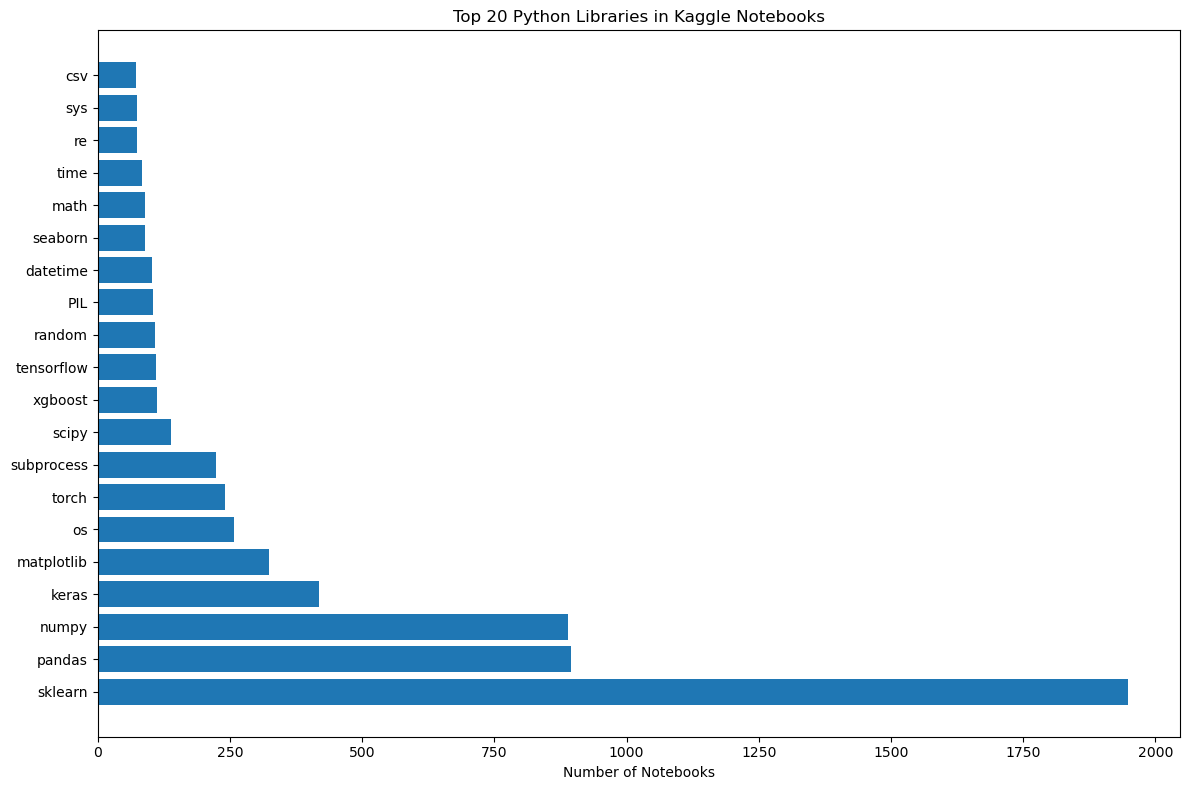

In [43]:
# Let's analyze ML/AI library usage in Python notebooks
import re
import random
from collections import Counter

# Function to extract library imports from Python code
def extract_python_imports(source_code):
    if not source_code or not isinstance(source_code, list) or not source_code[0]:
        return []
    
    imports = []
    import_patterns = [
        r'^\s*import\s+([a-zA-Z0-9_\.]+)', 
        r'^\s*from\s+([a-zA-Z0-9_\.]+)\s+import'
    ]
    
    for line in source_code[0]:
        for pattern in import_patterns:
            match = re.search(pattern, line)
            if match:
                # Extract the base package name (first component)
                lib = match.group(1).split('.')[0]
                imports.append(lib)
    
    return imports

# Sample a set of Python notebooks to analyze
python_versions = versions[versions['ScriptLanguageId'] == 2]  # Assuming 2 = Python
print(f"Total Python notebooks: {len(python_versions)}")

# Sample a manageable number of notebooks
sample_size = min(1000, len(python_versions))
sample_ids = random.sample(python_versions.index.tolist(), sample_size)
print(f"Sampling {sample_size} Python notebooks...")

# Extract imports from sampled notebooks
all_imports = []
successful_samples = 0

for kernel_id in sample_ids:
    source = get_source_code_by_id(kernel_id)
    if source:
        imports = extract_python_imports(source)
        if imports:
            all_imports.extend(imports)
            successful_samples += 1

# Count the most common libraries
import_counts = Counter(all_imports)
top_libraries = import_counts.most_common(20)

print(f"\nAnalyzed {successful_samples} Python notebooks successfully")
print("\nTop 20 imported Python libraries:")
for lib, count in top_libraries:
    print(f"{lib}: {count} ({count/successful_samples*100:.1f}%)")

# Plot the results
try:
    import matplotlib.pyplot as plt
    
    libraries, counts = zip(*top_libraries)
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(libraries)), counts, align='center')
    plt.yticks(range(len(libraries)), libraries)
    plt.xlabel('Number of Notebooks')
    plt.title('Top 20 Python Libraries in Kaggle Notebooks')
    plt.tight_layout()
    plt.show()
except:
    print("Couldn't create plot. Matplotlib may not be available.")

In [44]:
# Let's analyze model performance trends over time in competitions
# This can help us understand the progress in ML/AI

# Function to analyze competition performance trends
def analyze_competition_performance(competition_id, submissions_df):
    """Analyze how performance in a specific competition has evolved over time"""
    if 'CompetitionId' not in submissions_df.columns:
        return None
    
    comp_submissions = submissions_df[submissions_df['CompetitionId'] == competition_id].copy()
    
    if comp_submissions.empty:
        return None
    
    # Ensure we have the necessary columns
    required_cols = ['SubmissionDate', 'PublicScore']
    if not all(col in comp_submissions.columns for col in required_cols):
        return None
    
    # Convert date and ensure score is numeric
    try:
        comp_submissions['SubmissionDate'] = pd.to_datetime(comp_submissions['SubmissionDate'], errors='coerce')
        comp_submissions['PublicScore'] = pd.to_numeric(comp_submissions['PublicScore'], errors='coerce')
        
        # Drop rows with missing dates or scores
        comp_submissions = comp_submissions.dropna(subset=['SubmissionDate', 'PublicScore'])
        
        if comp_submissions.empty:
            return None
        
        # Sort by date
        comp_submissions = comp_submissions.sort_values('SubmissionDate')
        
        # Calculate rolling best score over time
        if len(comp_submissions) > 0:
            # Determine if higher or lower scores are better
            # This is a simplistic approach - ideally we'd check the competition's actual metric
            first_score = comp_submissions['PublicScore'].iloc[0]
            last_score = comp_submissions['PublicScore'].iloc[-1]
            
            # Assuming improvement over time
            higher_is_better = last_score > first_score
            
            if higher_is_better:
                comp_submissions['BestScore'] = comp_submissions['PublicScore'].cummax()
            else:
                comp_submissions['BestScore'] = comp_submissions['PublicScore'].cummin()
                
            return comp_submissions
    except:
        pass
    
    return None

# Get a list of completed competitions
if 'EnabledDate' in competitions.columns and 'DeadlineDate' in competitions.columns:
    try:
        competitions['EnabledDate'] = pd.to_datetime(competitions['EnabledDate'], errors='coerce')
        competitions['DeadlineDate'] = pd.to_datetime(competitions['DeadlineDate'], errors='coerce')
        completed_competitions = competitions.dropna(subset=['EnabledDate', 'DeadlineDate'])
        
        # Find competitions with sufficient submissions
        if 'CompetitionId' in submissions.columns:
            submission_counts = submissions['CompetitionId'].value_counts()
            popular_competitions = submission_counts[submission_counts > 100].index.tolist()
            
            print(f"Found {len(popular_competitions)} competitions with over 100 submissions")
            
            # Select a competition for detailed analysis
            if popular_competitions:
                sample_competition_id = popular_competitions[0]
                competition_name = "Unknown"
                
                if 'Id' in competitions.columns and 'Title' in competitions.columns:
                    comp_info = competitions[competitions['Id'] == sample_competition_id]
                    if not comp_info.empty and 'Title' in comp_info.columns:
                        competition_name = comp_info['Title'].iloc[0]
                
                print(f"\nAnalyzing competition performance trends for: {competition_name} (ID: {sample_competition_id})")
                
                # Analyze the performance trends
                performance_data = analyze_competition_performance(sample_competition_id, submissions)
                
                if performance_data is not None and not performance_data.empty:
                    # Resample to daily frequency for clarity in visualization
                    daily_best = performance_data.set_index('SubmissionDate')
                    daily_best = daily_best[['BestScore']].resample('D').max().fillna(method='ffill')
                    
                    print(f"Performance data available from {daily_best.index.min()} to {daily_best.index.max()}")
                    
                    try:
                        import matplotlib.pyplot as plt
                        import matplotlib.dates as mdates
                        
                        plt.figure(figsize=(14, 8))
                        plt.plot(daily_best.index, daily_best['BestScore'])
                        plt.title(f'Performance Evolution in Competition: {competition_name}')
                        plt.xlabel('Date')
                        plt.ylabel('Best Score')
                        plt.grid(True, alpha=0.3)
                        
                        # Format x-axis date ticks
                        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
                        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
                        plt.gcf().autofmt_xdate()
                        
                        plt.tight_layout()
                        plt.show()
                    except:
                        print("Couldn't create plot. Matplotlib may not be available.")
                else:
                    print("Insufficient performance data for analysis")
    except:
        print("Error analyzing competition performance trends")

In [45]:
# Summary of Meta Kaggle Dataset Structure
print("# Meta Kaggle Dataset Structure Summary\n")

# Define the main entity groups and their relationships
entity_groups = {
    "User Entities": ["Users.csv", "UserFollowers.csv", "UserAchievements.csv", "UserOrganizations.csv"],
    "Competition Entities": ["Competitions.csv", "CompetitionTags.csv", "Submissions.csv"],
    "Kernel/Notebook Entities": ["Kernels.csv", "KernelVersions.csv", "KernelTags.csv", "KernelLanguages.csv", "KernelVotes.csv"],
    "Dataset Entities": ["Datasets.csv", "DatasetVersions.csv", "DatasetTags.csv", "DatasetVotes.csv", "DatasetTasks.csv"],
    "Model Entities": ["Models.csv", "ModelVersions.csv", "ModelTags.csv", "ModelVariations.csv", "ModelVariationVersions.csv", "ModelVotes.csv"],
    "Forum Entities": ["Forums.csv", "ForumTopics.csv", "ForumMessages.csv", "ForumMessageVotes.csv", "ForumMessageReactions.csv"],
    "Team Entities": ["Teams.csv", "TeamMemberships.csv"],
    "Relationship Tables": [
        "KernelVersionCompetitionSources.csv",
        "KernelVersionDatasetSources.csv",
        "KernelVersionKernelSources.csv",
        "KernelVersionModelSources.csv",
    ],
    "Other": ["Tags.csv", "Organizations.csv", "Datasources.csv", "Episodes.csv", "EpisodeAgents.csv"],
}

# Print summary
for group, files in entity_groups.items():
    print(f"\n## {group}")
    for file in files:
        if file in csv_files:
            try:
                df = pd.read_csv(f"{MK_PATH}/{file}", nrows=0)
                print(f"- {file}: {len(df.columns)} columns")
                print(f"  Columns: {', '.join(df.columns.tolist())}")
            except Exception as e:
                print(f"- {file}: Error - {e}")
        else:
            print(f"- {file}: Not found in dataset")
            
# Show the Entity Relationship diagram (text-based)
print("\n\n# Main Entity Relationships\n")
print("""
Users <---> UserFollowers
Users <---> UserAchievements
Users <---> Teams <---> TeamMemberships
Users <---> Organizations <---> UserOrganizations

Competitions <---> CompetitionTags <---> Tags
Competitions <---> Submissions <--- Teams
Competitions <---> KernelVersionCompetitionSources <---> KernelVersions

Kernels <---> KernelVersions <---> KernelLanguages
KernelVersions <---> KernelVersionCompetitionSources
KernelVersions <---> KernelVersionDatasetSources
KernelVersions <---> KernelVersionKernelSources
KernelVersions <---> KernelVersionModelSources
Kernels <---> KernelTags <---> Tags

Datasets <---> DatasetVersions
Datasets <---> DatasetTags <---> Tags
DatasetVersions <---> KernelVersionDatasetSources

Models <---> ModelVersions
Models <---> ModelTags <---> Tags
ModelVersions <---> KernelVersionModelSources

Forums <---> ForumTopics <---> ForumMessages
ForumMessages <---> ForumMessageVotes
ForumMessages <---> ForumMessageReactions
""")

# Meta Kaggle Dataset Structure Summary


## User Entities
- Users.csv: 7 columns
  Columns: Id, UserName, DisplayName, RegisterDate, PerformanceTier, Country, LocationSharingOptOut
- UserFollowers.csv: 4 columns
  Columns: Id, UserId, FollowingUserId, CreationDate
- UserAchievements.csv: 11 columns
  Columns: Id, UserId, AchievementType, Tier, TierAchievementDate, Points, CurrentRanking, HighestRanking, TotalGold, TotalSilver, TotalBronze
- UserOrganizations.csv: 4 columns
  Columns: Id, UserId, OrganizationId, JoinDate

## Competition Entities
- Competitions.csv: 48 columns
  Columns: Id, Slug, Title, Subtitle, HostSegmentTitle, ForumId, OrganizationId, EnabledDate, DeadlineDate, ProhibitNewEntrantsDeadlineDate, TeamMergerDeadlineDate, TeamModelDeadlineDate, ModelSubmissionDeadlineDate, FinalLeaderboardHasBeenVerified, HasKernels, OnlyAllowKernelSubmissions, HasLeaderboard, LeaderboardPercentage, ScoreTruncationNumDecimals, EvaluationAlgorithmAbbreviation, EvaluationAlgorithmName, Ev

## Analysis of Meta Kaggle Code

In [47]:
# Let's analyze file extensions to understand the distribution of file types
import os
from collections import Counter

def analyze_file_extensions(path, max_files=10000):
    """
    Analyze file extensions in the given path, sampling up to max_files
    """
    extensions = []
    file_count = 0
    
    # Walk through directories
    for root, dirs, files in os.walk(path):
        for file in files:
            # Get file extension
            _, ext = os.path.splitext(file)
            if ext:
                extensions.append(ext.lower())  # Convert to lowercase
            
            file_count += 1
            if file_count >= max_files:
                break
        
        if file_count >= max_files:
            break
    
    # Count extensions
    ext_counts = Counter(extensions)
    
    print(f"Analyzed {file_count} files")
    print(f"\nFile extension distribution:")
    for ext, count in ext_counts.most_common(10):
        print(f"{ext}: {count} files ({count/file_count*100:.1f}%)")
    
    return ext_counts

# Analyze file extensions in Meta Kaggle Code
ext_counts = analyze_file_extensions(MKC_PATH, max_files=10000)

Analyzed 10000 files

File extension distribution:
.py: 5385 files (53.8%)
.r: 4002 files (40.0%)
.rmd: 276 files (2.8%)
.sql: 187 files (1.9%)
.jl: 150 files (1.5%)


In [48]:
# Let's examine files by creation date to see how Kaggle code has evolved
print("# Code Evolution Analysis\n")

# Sample some kernel versions from different time periods
def sample_kernels_by_time_period(versions_df, n_samples=5):
    """
    Sample kernel versions from different time periods
    """
    versions_df = versions_df.copy()
    
    # Convert creation date to datetime
    versions_df['CreationDate'] = pd.to_datetime(versions_df['CreationDate'], errors='coerce')
    
    # Add year column
    versions_df['Year'] = versions_df['CreationDate'].dt.year
    
    # Get unique years
    years = sorted(versions_df['Year'].dropna().unique())
    
    print(f"Found kernels from {min(years)} to {max(years)}")
    
    # Sample from each year
    samples = []
    for year in years:
        year_kernels = versions_df[versions_df['Year'] == year]
        if len(year_kernels) > 0:
            # Sample n_samples or all if less than n_samples
            year_samples = year_kernels.sample(min(n_samples, len(year_kernels)))
            samples.append(year_samples)
    
    # Combine samples
    if samples:
        return pd.concat(samples)
    return None

# Sample kernels from different time periods
kernel_samples = sample_kernels_by_time_period(versions, n_samples=3)

if kernel_samples is not None:
    print(f"\nSampled {len(kernel_samples)} kernels from different years:")
    for idx, row in kernel_samples.iterrows():
        print(f"ID: {idx}, Year: {row['Year']}, Title: {row['Title'][:50]}{'...' if len(row['Title']) > 50 else ''}")
else:
    print("No kernel samples found")

# Code Evolution Analysis

Found kernels from 2015 to 2025

Sampled 33 kernels from different years:
ID: 69292, Year: 2015, Title: Multiprocess Prime
ID: 71552, Year: 2015, Title: H20 Deep Learning
ID: 83836, Year: 2015, Title: playing
ID: 189423, Year: 2016, Title: test_script
ID: 557107, Year: 2016, Title: started with Titanic
ID: 508320, Year: 2016, Title: Notebookf047f3a7de
ID: 1127054, Year: 2017, Title: xboost_simple_trial
ID: 1730795, Year: 2017, Title: track animation test1
ID: 681098, Year: 2017, Title: Notebookcbf1f70ec2
ID: 3750382, Year: 2018, Title: VotingClassifier : F1_score = 0.88 (+ data viz)
ID: 8231507, Year: 2018, Title: NHL Stats - Pandas Project
ID: 6497655, Year: 2018, Title: PUBG an extensive EDA
ID: 11900545, Year: 2019, Title: Prediction using Multiple Models
ID: 21094045, Year: 2019, Title: SQL Scavenger Hunt: Day 1
ID: 24533652, Year: 2019, Title: Stock Price Data Visualization
ID: 43771732, Year: 2020, Title: Titanic_EDA ML
ID: 27981685, Year: 2020, Title: 

In [49]:
# Let's examine example files for each major file type
print("# Example Files Analysis\n")

# Find examples of Python (.py) and Jupyter (.ipynb) files
def find_file_examples(path, extensions=['.py', '.ipynb', '.r'], max_files_per_ext=3):
    """
    Find example files for each extension type
    """
    examples = {ext: [] for ext in extensions}
    
    for root, dirs, files in os.walk(path):
        for file in files:
            file_path = os.path.join(root, file)
            _, ext = os.path.splitext(file)
            ext = ext.lower()
            
            if ext in extensions and len(examples[ext]) < max_files_per_ext:
                examples[ext].append(file_path)
            
            # Check if we have enough examples for all extensions
            if all(len(examples[ext]) >= max_files_per_ext for ext in extensions):
                break
        
        # Check if we have enough examples for all extensions
        if all(len(examples[ext]) >= max_files_per_ext for ext in extensions):
            break
    
    return examples

# Find example files
file_examples = find_file_examples(MKC_PATH)

# Print file examples found
print("File examples found:")
for ext, examples in file_examples.items():
    print(f"\n{ext} files: {len(examples)}")
    for i, example in enumerate(examples):
        print(f"  {i+1}. {os.path.basename(example)} - {example}")

# Now let's analyze the content of a Python example
if file_examples.get('.py') and len(file_examples['.py']) > 0:
    print("\n\nExample Python file analysis:")
    py_example = file_examples['.py'][0]
    py_id = path_to_id(py_example)
    
    if py_id:
        print(f"File ID: {py_id}")
        source = get_source_code_by_id(py_id)
        if source:
            # Count lines and extract imports
            total_lines = sum(len(cell) for cell in source)
            
            # Extract imports
            imports = []
            for cell in source:
                for line in cell:
                    if line.startswith('import ') or line.startswith('from '):
                        imports.append(line.strip())
            
            print(f"Total lines: {total_lines}")
            print("First 10 lines:")
            for line in source[0][:10]:
                print(f"  {line}")
            
            if imports:
                print("\nImports used:")
                for imp in imports[:10]:  # Show up to 10 imports
                    print(f"  {imp}")
                if len(imports) > 10:
                    print(f"  ... and {len(imports) - 10} more")

# Now let's analyze the content of a Jupyter notebook example
if file_examples.get('.ipynb') and len(file_examples['.ipynb']) > 0:
    print("\n\nExample Jupyter notebook analysis:")
    ipynb_example = file_examples['.ipynb'][0]
    ipynb_id = path_to_id(ipynb_example)
    
    if ipynb_id:
        print(f"File ID: {ipynb_id}")
        source = get_source_code_by_id(ipynb_id)
        if source:
            # Count cells and lines
            cell_count = len(source)
            total_lines = sum(len(cell) for cell in source)
            
            print(f"Number of code cells: {cell_count}")
            print(f"Total lines across all cells: {total_lines}")
            
            if cell_count > 0 and len(source[0]) > 0:
                print("\nFirst few lines of first cell:")
                for line in source[0][:5]:
                    print(f"  {line}")
                
                if len(source) > 1:
                    print("\nFirst few lines of second cell:")
                    for line in source[1][:5]:
                        print(f"  {line}")

# Now let's analyze an R script if available
if file_examples.get('.r') and len(file_examples['.r']) > 0:
    print("\n\nExample R script analysis:")
    r_example = file_examples['.r'][0]
    r_id = path_to_id(r_example)
    
    if r_id:
        print(f"File ID: {r_id}")
        source = get_source_code_by_id(r_id)
        if source:
            # Count lines
            total_lines = sum(len(cell) for cell in source)
            
            # Extract library imports
            r_imports = []
            for cell in source:
                for line in cell:
                    if 'library(' in line or 'require(' in line:
                        r_imports.append(line.strip())
            
            print(f"Total lines: {total_lines}")
            print("First 10 lines:")
            for line in source[0][:10]:
                print(f"  {line}")
            
            if r_imports:
                print("\nLibraries used:")
                for imp in r_imports[:10]:  # Show up to 10 imports
                    print(f"  {imp}")
                if len(r_imports) > 10:
                    print(f"  ... and {len(r_imports) - 10} more")

# Example Files Analysis

File examples found:

.py files: 3
  1. 539.py - /Volumes/LaCie/ML/meta-kaggle-dataset/datasets/kaggle/meta-kaggle-code/versions/115/0000/000/539.py
  2. 541.py - /Volumes/LaCie/ML/meta-kaggle-dataset/datasets/kaggle/meta-kaggle-code/versions/115/0000/000/541.py
  3. 542.py - /Volumes/LaCie/ML/meta-kaggle-dataset/datasets/kaggle/meta-kaggle-code/versions/115/0000/000/542.py

.ipynb files: 3
  1. 68986.ipynb - /Volumes/LaCie/ML/meta-kaggle-dataset/datasets/kaggle/meta-kaggle-code/versions/115/0000/068/68986.ipynb
  2. 69235.ipynb - /Volumes/LaCie/ML/meta-kaggle-dataset/datasets/kaggle/meta-kaggle-code/versions/115/0000/069/69235.ipynb
  3. 69939.ipynb - /Volumes/LaCie/ML/meta-kaggle-dataset/datasets/kaggle/meta-kaggle-code/versions/115/0000/069/69939.ipynb

.r files: 3
  1. 1.r - /Volumes/LaCie/ML/meta-kaggle-dataset/datasets/kaggle/meta-kaggle-code/versions/115/0000/000/1.r
  2. 10.r - /Volumes/LaCie/ML/meta-kaggle-dataset/datasets/kaggle/meta-kaggle-code/vers

In [50]:
# Let's analyze code complexity and topics over time
print("# Code Complexity and Topic Evolution\n")

# Function to calculate complexity metrics for code
def calculate_code_complexity(source_code):
    """
    Calculate simple complexity metrics for code
    """
    if not source_code or not isinstance(source_code, list):
        return None
    
    # Combine all cells
    all_lines = []
    for cell in source_code:
        all_lines.extend(cell)
    
    # Count lines
    total_lines = len(all_lines)
    
    # Count non-empty, non-comment lines
    code_lines = sum(1 for line in all_lines if line.strip() and not line.strip().startswith('#'))
    
    # Count functions and classes
    function_count = sum(1 for line in all_lines if line.strip().startswith('def '))
    class_count = sum(1 for line in all_lines if line.strip().startswith('class '))
    
    # Count imports
    import_count = sum(1 for line in all_lines if line.strip().startswith(('import ', 'from ')))
    
    # Count loops and conditionals (simple approximation)
    loop_count = sum(1 for line in all_lines if any(kw in line for kw in ['for ', 'while ']))
    conditional_count = sum(1 for line in all_lines if any(kw in line for kw in ['if ', 'elif ', 'else:']))
    
    return {
        'total_lines': total_lines,
        'code_lines': code_lines,
        'function_count': function_count,
        'class_count': class_count,
        'import_count': import_count,
        'loop_count': loop_count,
        'conditional_count': conditional_count,
    }

# Sample Python kernel versions from different years and analyze complexity
if 'ScriptLanguageId' in versions.columns:
    # Convert creation date to datetime
    versions['CreationDate'] = pd.to_datetime(versions['CreationDate'], errors='coerce')
    
    # Add year column
    versions['Year'] = versions['CreationDate'].dt.year
    
    # Only look at Python files
    python_versions = versions[versions['ScriptLanguageId'] == 2]
    
    # Group by year and sample a few from each year
    year_groups = python_versions.groupby('Year')
    samples = []
    
    print("Analyzing code complexity by year...")
    
    # For each year, sample up to 10 kernels and analyze complexity
    yearly_complexity = {}
    for year, group in year_groups:
        if year and not pd.isna(year):
            year_samples = group.sample(min(10, len(group)))
            
            # Calculate complexity metrics for each sample
            metrics_list = []
            for idx in year_samples.index:
                source = get_source_code_by_id(idx)
                if source:
                    metrics = calculate_code_complexity(source)
                    if metrics:
                        metrics_list.append(metrics)
            
            # Calculate average metrics for the year
            if metrics_list:
                avg_metrics = {
                    'total_lines': sum(m['total_lines'] for m in metrics_list) / len(metrics_list),
                    'function_count': sum(m['function_count'] for m in metrics_list) / len(metrics_list),
                    'class_count': sum(m['class_count'] for m in metrics_list) / len(metrics_list),
                    'import_count': sum(m['import_count'] for m in metrics_list) / len(metrics_list),
                    'loop_count': sum(m['loop_count'] for m in metrics_list) / len(metrics_list),
                    'conditional_count': sum(m['conditional_count'] for m in metrics_list) / len(metrics_list),
                }
                yearly_complexity[year] = avg_metrics
    
    # Print yearly complexity trends
    print("\nCode complexity trends by year:")
    years = sorted(yearly_complexity.keys())
    if years:
        # Print metrics as a table
        metrics = ['total_lines', 'function_count', 'class_count', 'import_count', 'loop_count', 'conditional_count']
        
        # Print header
        print(f"{'Year':<6}", end="")
        for metric in metrics:
            print(f"{metric:<15}", end="")
        print()
        
        # Print values
        for year in years:
            print(f"{year:<6}", end="")
            for metric in metrics:
                print(f"{yearly_complexity[year][metric]:<15.1f}", end="")
            print()
            
        # Show a simple growth factor from first to last year
        if len(years) > 1:
            first_year = years[0]
            last_year = years[-1]
            print("\nGrowth factor (last year / first year):")
            for metric in metrics:
                if yearly_complexity[first_year][metric] > 0:
                    growth = yearly_complexity[last_year][metric] / yearly_complexity[first_year][metric]
                    print(f"{metric}: {growth:.2f}x")
    else:
        print("No yearly complexity data available")

# Code Complexity and Topic Evolution

Analyzing code complexity by year...

Code complexity trends by year:
Year  total_lines    function_count class_count    import_count   loop_count     conditional_count
2015  188.0          6.0            1.4            8.4            6.4            5.1            
2016  167.6          4.6            0.0            7.5            5.7            4.9            
2017  64.0           0.4            0.0            4.7            3.3            0.7            
2018  319.5          11.5           0.8            15.2           7.1            16.2           
2019  104.8          2.3            0.0            8.1            3.0            1.1            
2020  283.2          10.4           1.0            16.5           14.3           14.4           
2021  187.5          8.5            0.7            7.3            13.1           13.9           
2022  367.5          17.6           3.5            29.8           12.1           11.2           
2023  296.4     